In [1]:
import os
from astropy.timeseries import LombScargle
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import optimize
from scipy.interpolate import CubicSpline
from scipy.integrate import simps
from scipy.interpolate import UnivariateSpline
from scipy.ndimage import gaussian_filter
import scipy.signal as signal
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from scipy.ndimage.filters import uniform_filter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
def foldMeth(timeArray, period):
    phases = []
    for el in timeArray:
        passed = int(el/period)
        leftover = el - (passed*period)
        phase = leftover/period
        phases.append(phase)
    return np.array(phases)

def StraightLine(x, A, B):
    return A*x + B

def quadratic(x, A, B, C):
    return A*x*x + B*x + C
def area_est(xpoints, ypoints, start, finish):
    
    startIdx = find_nearest(xpoints, start)
    finishIdx = find_nearest(xpoints, finish)
    xpoints = xpoints[startIdx:finishIdx]
    ypoints = ypoints[startIdx:finishIdx]
    areaEst = np.trapz(ypoints, x=xpoints)
    return areaEst

def SNREst(fluxVal):
    signal = np.median(fluxVal)
    errors = []
    for el in fluxVal:
        error = np.abs(el-signal)
        errors.append(error)
    return signal/np.mean(errors)
def EWUn(N, dw, SNR, countsEm, countsCont, lenCont):
    r = (countsEm/ countsCont)
    return ((N*dw*dw)/(SNR*SNR))*(r/lenCont)*(r+lenCont)

In [3]:
pathB = "C:/Users/Admin/specpol/blue/"
pathR = "C:/Users/Admin/specpol/red/"

In [4]:
pathFull1 = pathR  +'Profiles_19_36.dat'
pathFull2 = pathR  +'Profiles_19_47.dat'
pathFull3 = pathR  +'Profiles_19_57.dat'
pathFull4 = pathR  +'Profiles_20_07.dat'
pathFull5 = pathR  +'Profiles_20_18.dat'
pathFull6 = pathR  +'Profiles_20_28.dat'
pathFull7 = pathR  +'Profiles_20_39.dat'
pathFull8 = pathR  +'Profiles_20_49.dat'
pathFull9 = pathR  +'Profiles_20_59.dat'
pathFull10 = pathR  +'Profiles_21_10.dat'
pathFull11 = pathR  +'Profiles_21_20.dat'
pathFull12 = pathR  +'Profiles_21_31.dat'
dataframeR1 = pd.read_csv(pathFull1, delim_whitespace=True,header=None, skiprows=1,names=['Wavelength', 'I', 'V/I'] ,usecols=[0,1,3])
dataframeR2 = pd.read_csv(pathFull2, delim_whitespace=True,header=None, skiprows=1,names=['Wavelength', 'I', 'V/I'] ,usecols=[0,1,3])
dataframeR3 = pd.read_csv(pathFull3, delim_whitespace=True,header=None, skiprows=1,names=['Wavelength', 'I', 'V/I'] ,usecols=[0,1,3])
dataframeR4 = pd.read_csv(pathFull4, delim_whitespace=True,header=None, skiprows=1,names=['Wavelength', 'I', 'V/I'] ,usecols=[0,1,3])
dataframeR5 = pd.read_csv(pathFull5, delim_whitespace=True,header=None, skiprows=1,names=['Wavelength', 'I', 'V/I'] ,usecols=[0,1,3])
dataframeR6 = pd.read_csv(pathFull6, delim_whitespace=True,header=None, skiprows=1,names=['Wavelength', 'I', 'V/I'] ,usecols=[0,1,3])
dataframeR7 = pd.read_csv(pathFull7, delim_whitespace=True,header=None, skiprows=1,names=['Wavelength', 'I', 'V/I'] ,usecols=[0,1,3])
dataframeR8 = pd.read_csv(pathFull8, delim_whitespace=True,header=None, skiprows=1,names=['Wavelength', 'I', 'V/I'] ,usecols=[0,1,3])
dataframeR9 = pd.read_csv(pathFull9, delim_whitespace=True,header=None, skiprows=1,names=['Wavelength', 'I', 'V/I'] ,usecols=[0,1,3])
dataframeR10 = pd.read_csv(pathFull10, delim_whitespace=True,header=None, skiprows=1,names=['Wavelength', 'I', 'V/I'] ,usecols=[0,1,3])
dataframeR11 = pd.read_csv(pathFull11, delim_whitespace=True,header=None, skiprows=1,names=['Wavelength', 'I', 'V/I'] ,usecols=[0,1,3])
dataframeR12 = pd.read_csv(pathFull12, delim_whitespace=True,header=None, skiprows=1,names=['Wavelength', 'I', 'V/I'] ,usecols=[0,1,3])



startR1 = dataframeR1.index[dataframeR1['Wavelength'] == 6055.906].tolist()[0]
endR1 = dataframeR1.index[dataframeR1['Wavelength'] == 6949.993].tolist()[0]
print(len(dataframeR1['I'][startR1:endR1]))
print(startR1,endR1)


startR2 = dataframeR2.index[dataframeR2['Wavelength'] == 6055.906].tolist()[0]
endR2 = dataframeR2.index[dataframeR2['Wavelength'] == 6949.993].tolist()[0]
print(len(dataframeR2['I'][startR2:endR2]))
print(startR2,endR2)
startR3 = dataframeR3.index[dataframeR3['Wavelength'] == 6055.906].tolist()[0]
endR3 = dataframeR3.index[dataframeR3['Wavelength'] == 6949.993].tolist()[0]
print(len(dataframeR3['I'][startR3:endR3]))

startR4 = dataframeR4.index[dataframeR4['Wavelength'] == 6055.906].tolist()[0]
endR4 = dataframeR4.index[dataframeR4['Wavelength'] == 6949.993].tolist()[0]
print(len(dataframeR4['I'][startR4:endR4]))

startR5 = dataframeR5.index[dataframeR5['Wavelength'] == 6055.906].tolist()[0]
endR5 = dataframeR5.index[dataframeR5['Wavelength'] == 6949.993].tolist()[0]
print(len(dataframeR5['I'][startR5:endR5]))

startR6 = dataframeR6.index[dataframeR6['Wavelength'] == 6055.906].tolist()[0]
endR6 = dataframeR6.index[dataframeR6['Wavelength'] == 6949.993].tolist()[0]
print(len(dataframeR6['I'][startR6:endR6]))

startR7 = dataframeR7.index[dataframeR7['Wavelength'] == 6055.906].tolist()[0]
endR7 = dataframeR7.index[dataframeR7['Wavelength'] == 6949.993].tolist()[0]
print(len(dataframeR7['I'][startR7:endR7]))

startR8 = dataframeR8.index[dataframeR8['Wavelength'] == 6055.906].tolist()[0]
endR8 = dataframeR8.index[dataframeR8['Wavelength'] == 6949.993].tolist()[0]
print(len(dataframeR8['I'][startR8:endR8]))


startR9 = dataframeR9.index[dataframeR9['Wavelength'] == 6055.906].tolist()[0]
endR9 = dataframeR9.index[dataframeR9['Wavelength'] == 6949.993].tolist()[0]
print(len(dataframeR9['I'][startR9:endR9]))

startR10 = dataframeR10.index[dataframeR10['Wavelength'] == 6055.906].tolist()[0]
endR10 = dataframeR10.index[dataframeR10['Wavelength'] == 6949.993].tolist()[0]
print(len(dataframeR10['I'][startR10:endR10]))

startR11 = dataframeR11.index[dataframeR11['Wavelength'] == 6055.906].tolist()[0]
endR11 = dataframeR11.index[dataframeR11['Wavelength'] == 6949.993].tolist()[0]
print(len(dataframeR11['I'][startR11:endR11]))


startR12 = dataframeR12.index[dataframeR12['Wavelength'] == 6055.906].tolist()[0]
endR12 = dataframeR12.index[dataframeR12['Wavelength'] == 6949.993].tolist()[0]
print(len(dataframeR12['I'][startR12:endR12]))

allFluxesR = np.vstack((dataframeR1['I'][startR1:endR1], dataframeR2['I'][startR2:endR2]))
allFluxesR = np.vstack((allFluxesR, dataframeR3['I'][startR3:endR3]))
allFluxesR = np.vstack((allFluxesR, dataframeR4['I'][startR4:endR4]))
allFluxesR = np.vstack((allFluxesR, dataframeR5['I'][startR5:endR5]))
allFluxesR = np.vstack((allFluxesR, dataframeR6['I'][startR6:endR6]))
allFluxesR = np.vstack((allFluxesR, dataframeR7['I'][startR7:endR7]))
allFluxesR = np.vstack((allFluxesR, dataframeR8['I'][startR8:endR8]))
allFluxesR = np.vstack((allFluxesR, dataframeR9['I'][startR9:endR9]))
allFluxesR = np.vstack((allFluxesR, dataframeR10['I'][startR10:endR10]))
allFluxesR = np.vstack((allFluxesR, dataframeR11['I'][startR11:endR11]))
allFluxesR = np.vstack((allFluxesR, dataframeR12['I'][startR12:endR12]))

1809
81 1890
1809
79 1888
1809
1809
1809
1809
1809
1809
1809
1809
1809
1809


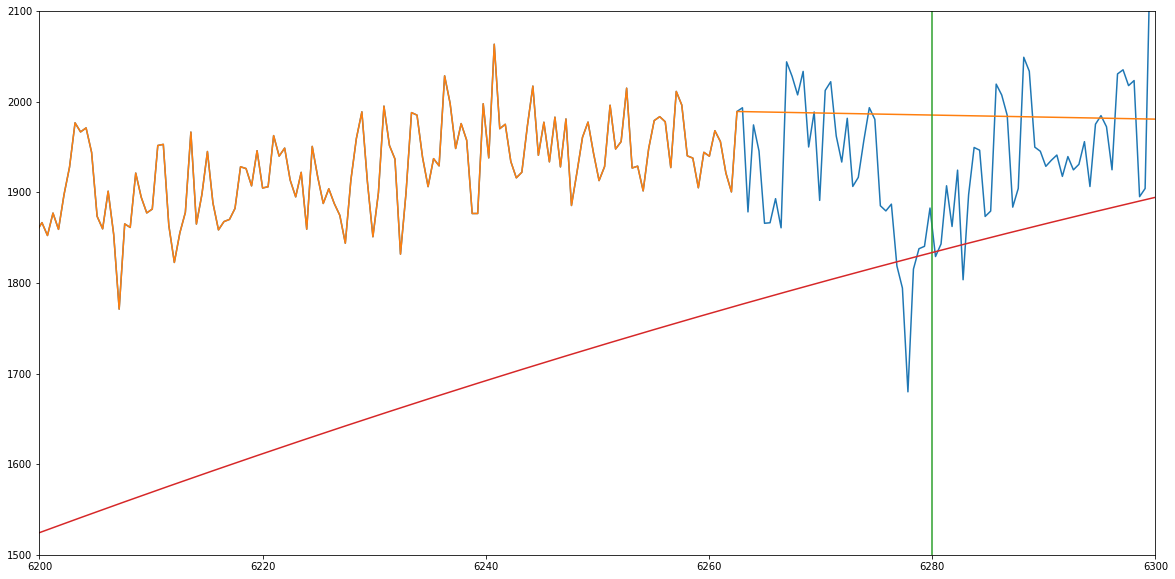

In [5]:
#[500:785] [985:1190] [1390:1675]
plt.figure(figsize=(20,10))
plt.plot(dataframeR1['Wavelength'], dataframeR1['I'])
fitx, fity = dataframeR1['Wavelength'][:500], dataframeR1['I'][:500]
fitx = np.append(fitx,dataframeR1['Wavelength'][785:985])
fity = np.append(fity, dataframeR1['I'][785:985])
fitx = np.append(fitx,dataframeR1['Wavelength'][1190:1390])
fity = np.append(fity, dataframeR1['I'][1190:1390])
fitx = np.append(fitx,dataframeR1['Wavelength'][1900:])
fity = np.append(fity, dataframeR1['I'][1900:])
popt, pcov = curve_fit(quadratic, fitx, fity)
plt.plot(fitx, fity)
plt.plot([6280,6280],[0,2100])
plt.xlim(6200,6300)
plt.ylim(1500,2100)
plt.plot(dataframeR1['Wavelength'], quadratic(dataframeR1['Wavelength'], *popt))

In [3]:
Times = [2458766.316477858,2458766.323699965,2458766.330933671,2458766.338178977,
             2458766.345528382,2458766.352657989,2458766.359891695,2458766.367125401,
             2458766.374347507,2458766.381581212,2458766.388814918,2458766.396060123]


firstB = [11.56, 11.59, 11.43, 11.53, 11.43, 11.28, 11.54, 11.28, 11.59, 11.61, 11.61, 11.67]
secondB = [11.89,11.94,11.86,11.48,11.45,11.41,11.44,11.65,11.23,11.48,11.61,11.71]

In [7]:
pathFull1 = pathB  +'Profiles_19_36.dat'
pathFull2 = pathB  +'Profiles_19_47.dat'
pathFull3 = pathB  +'Profiles_19_57.dat'
pathFull4 = pathB  +'Profiles_20_07.dat'
pathFull5 = pathB  +'Profiles_20_18.dat'
pathFull6 = pathB  +'Profiles_20_28.dat'
pathFull7 = pathB  +'Profiles_20_39.dat'
pathFull8 = pathB  +'Profiles_20_49.dat'
pathFull9 = pathB  +'Profiles_20_59.dat'
pathFull10 = pathB  +'Profiles_21_10.dat'
pathFull11 = pathB  +'Profiles_21_20.dat'
pathFull12 = pathB  +'Profiles_21_31.dat'
dataframe1 = pd.read_csv(pathFull1, delim_whitespace=True, names=['Wavelength', 'cleanFlux', 'dirtyFlux', 'V', 'FluxCleaner'] ,usecols=[0,1,2,3,4])
dataframe2 = pd.read_csv(pathFull2, delim_whitespace=True, names=['Wavelength', 'cleanFlux', 'dirtyFlux', 'V', 'FluxCleaner'] ,usecols=[0,1,2,3,4])
dataframe3 = pd.read_csv(pathFull3, delim_whitespace=True, names=['Wavelength', 'cleanFlux', 'dirtyFlux', 'V', 'FluxCleaner'] ,usecols=[0,1,2,3,4])
dataframe4 = pd.read_csv(pathFull4, delim_whitespace=True, names=['Wavelength', 'cleanFlux', 'dirtyFlux', 'V', 'FluxCleaner'] ,usecols=[0,1,2,3,4])
dataframe5 = pd.read_csv(pathFull5, delim_whitespace=True, names=['Wavelength', 'cleanFlux', 'dirtyFlux', 'V', 'FluxCleaner'] ,usecols=[0,1,2,3,4])
dataframe6 = pd.read_csv(pathFull6, delim_whitespace=True, names=['Wavelength', 'cleanFlux', 'dirtyFlux', 'V', 'FluxCleaner'] ,usecols=[0,1,2,3,4])
dataframe7 = pd.read_csv(pathFull7, delim_whitespace=True, names=['Wavelength', 'cleanFlux', 'dirtyFlux', 'V', 'FluxCleaner'] ,usecols=[0,1,2,3,4])
dataframe8 = pd.read_csv(pathFull8, delim_whitespace=True, names=['Wavelength', 'cleanFlux', 'dirtyFlux', 'V', 'FluxCleaner'] ,usecols=[0,1,2,3,4])
dataframe9 = pd.read_csv(pathFull9, delim_whitespace=True, names=['Wavelength', 'cleanFlux', 'dirtyFlux', 'V', 'FluxCleaner'] ,usecols=[0,1,2,3,4])
dataframe10 = pd.read_csv(pathFull10, delim_whitespace=True, names=['Wavelength', 'cleanFlux', 'dirtyFlux', 'V', 'FluxCleaner'] ,usecols=[0,1,2,3,4])
dataframe11 = pd.read_csv(pathFull11, delim_whitespace=True, names=['Wavelength', 'cleanFlux', 'dirtyFlux', 'V', 'FluxCleaner'] ,usecols=[0,1,2,3,4])
dataframe12 = pd.read_csv(pathFull12, delim_whitespace=True, names=['Wavelength', 'cleanFlux', 'dirtyFlux', 'V', 'FluxCleaner'] ,usecols=[0,1,2,3,4])


6287.706
6361.843000000001
6510.116
6608.965
6707.814
6846.201999999999


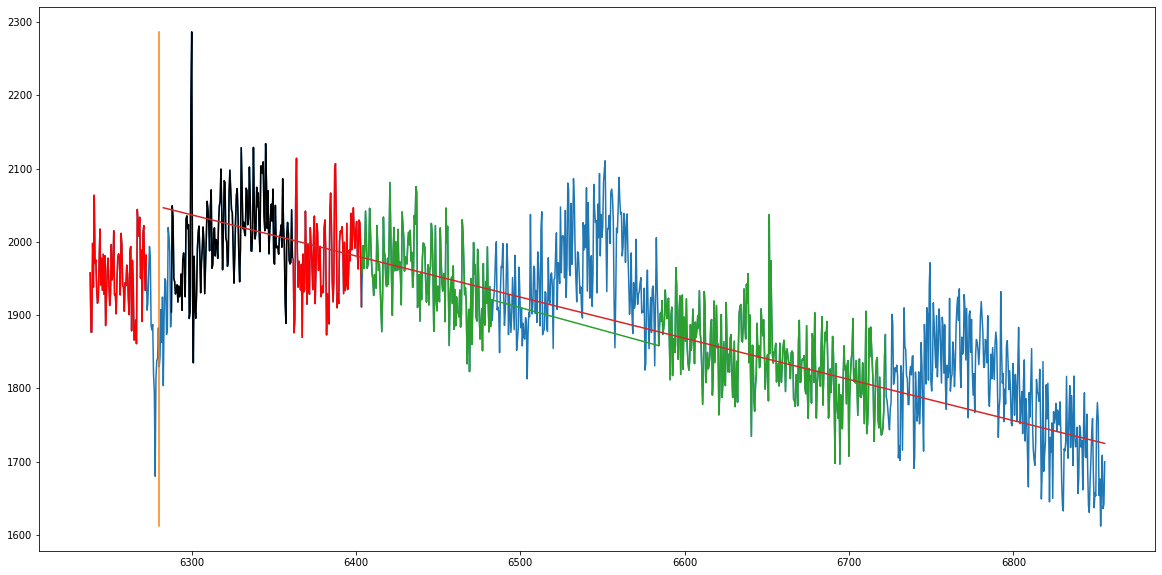

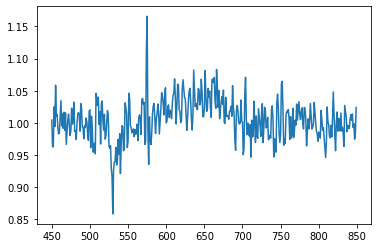

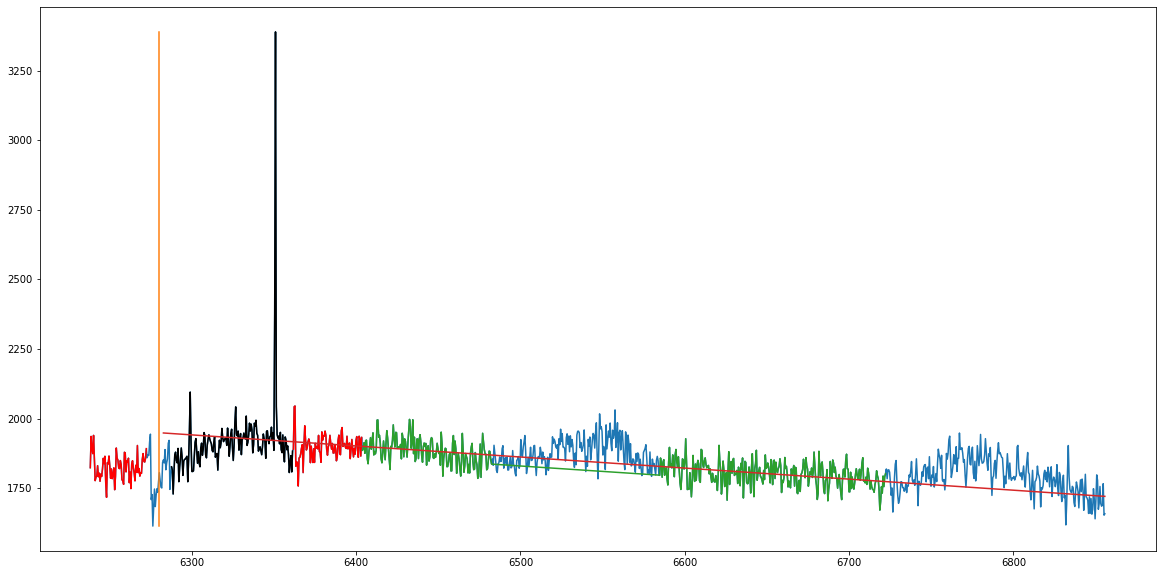

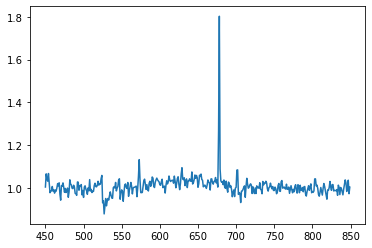

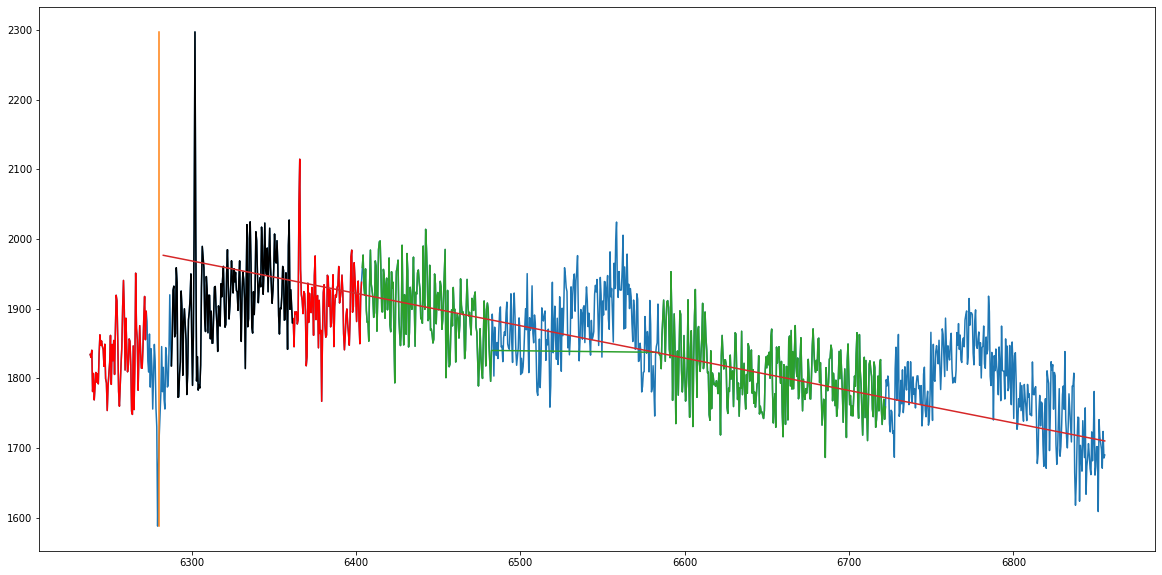

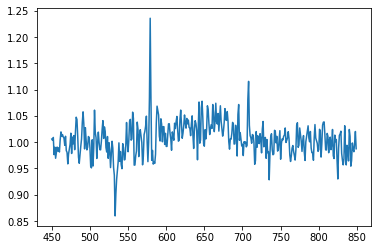

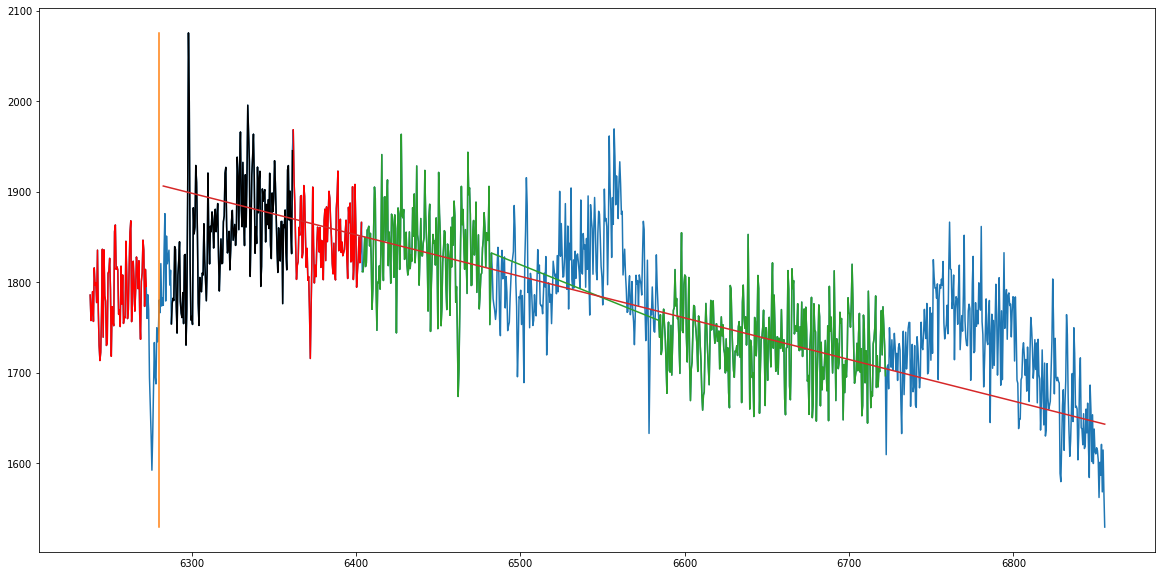

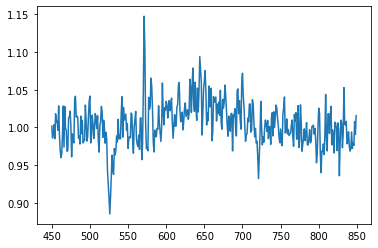

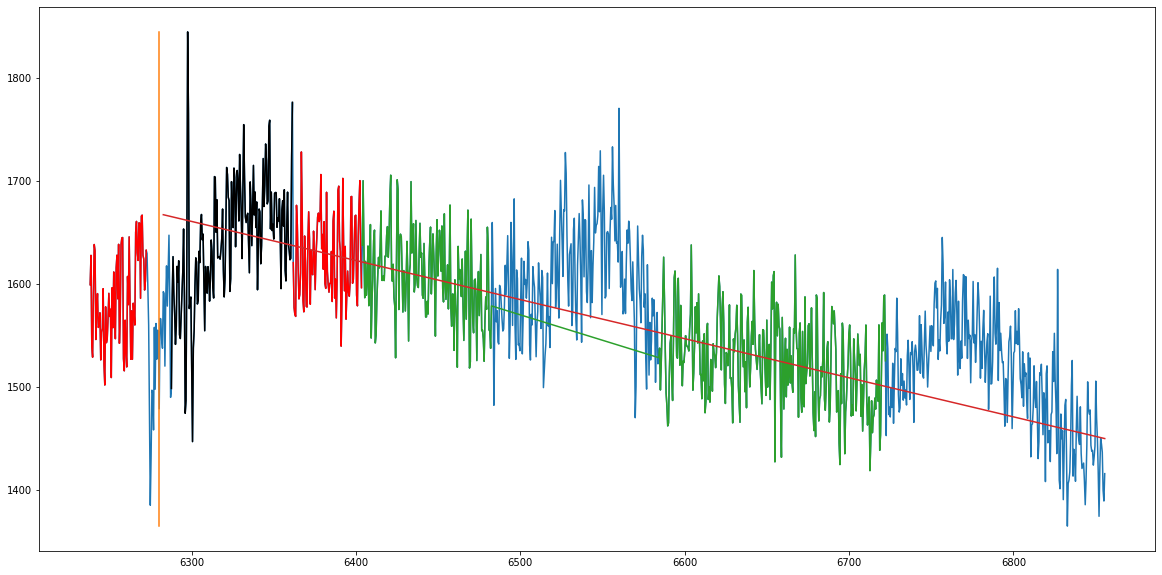

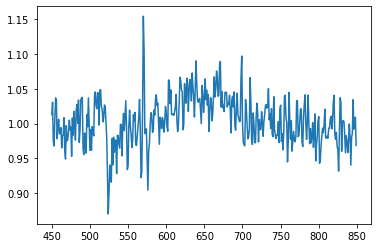

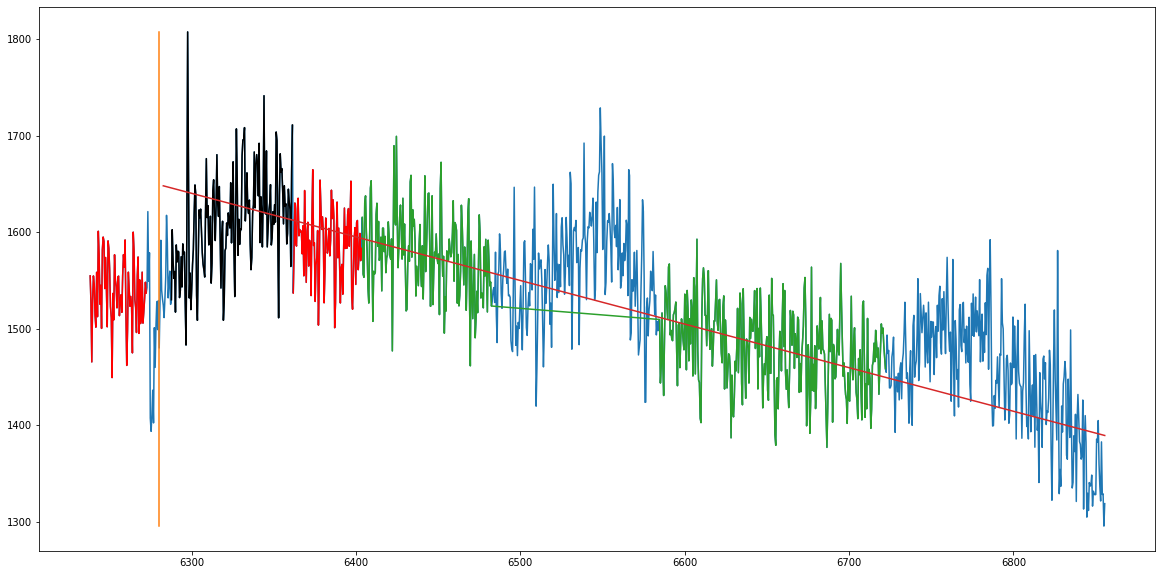

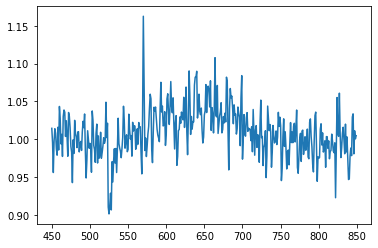

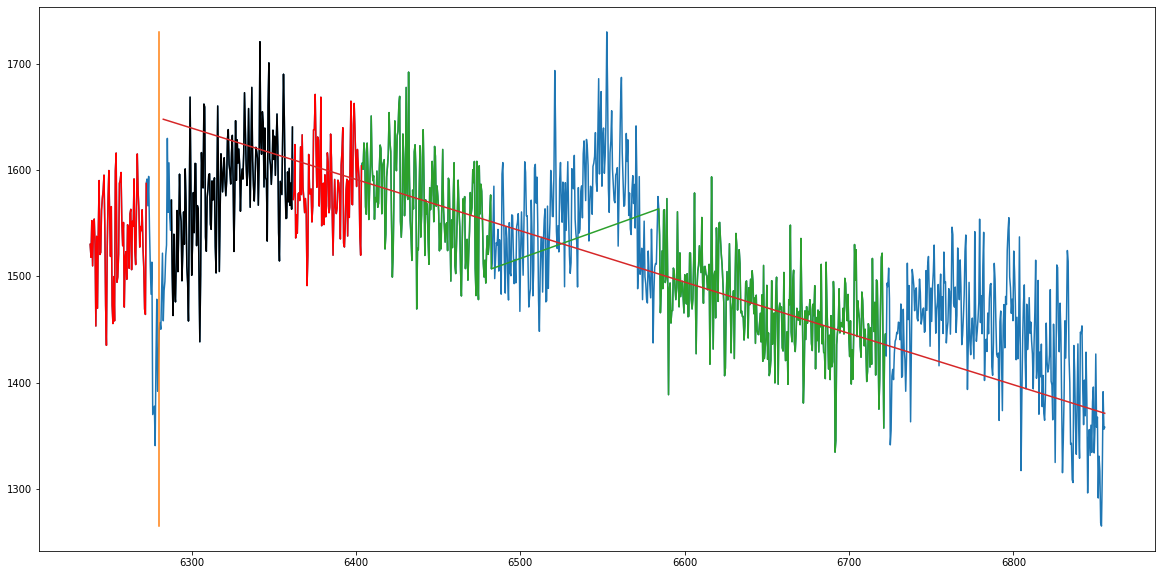

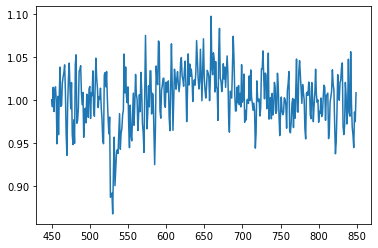

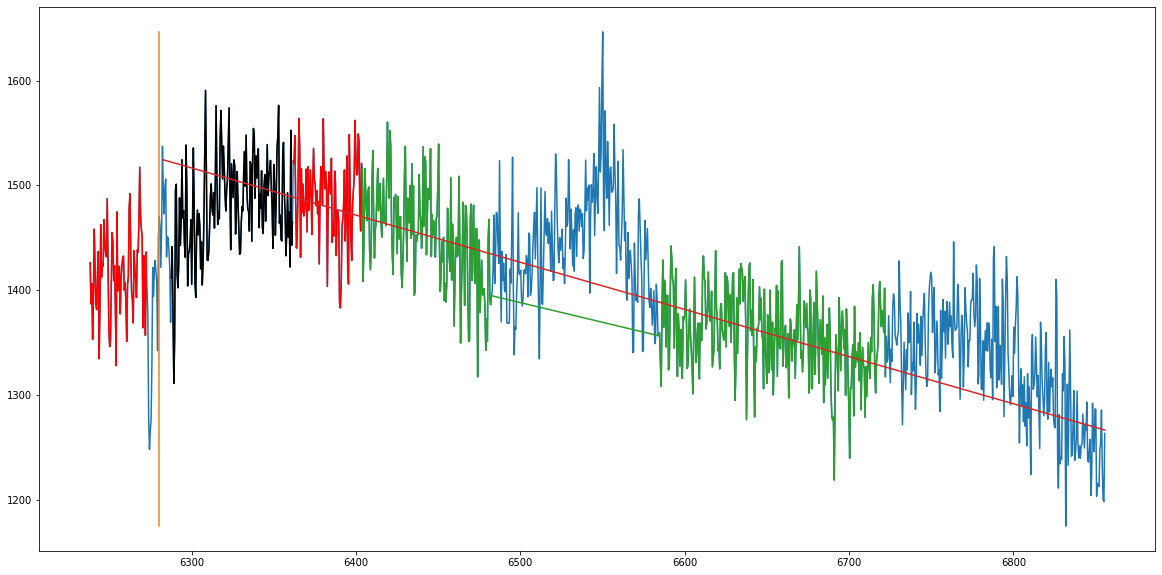

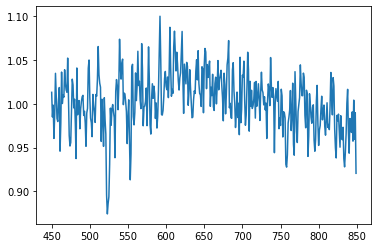

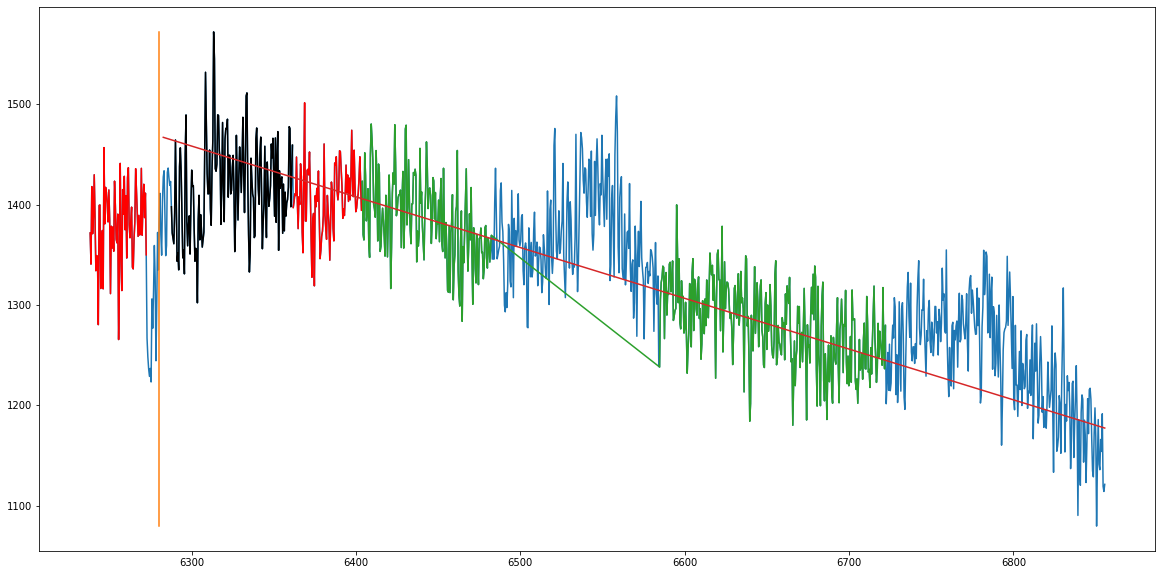

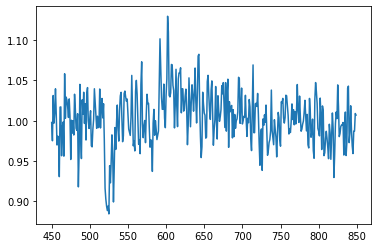

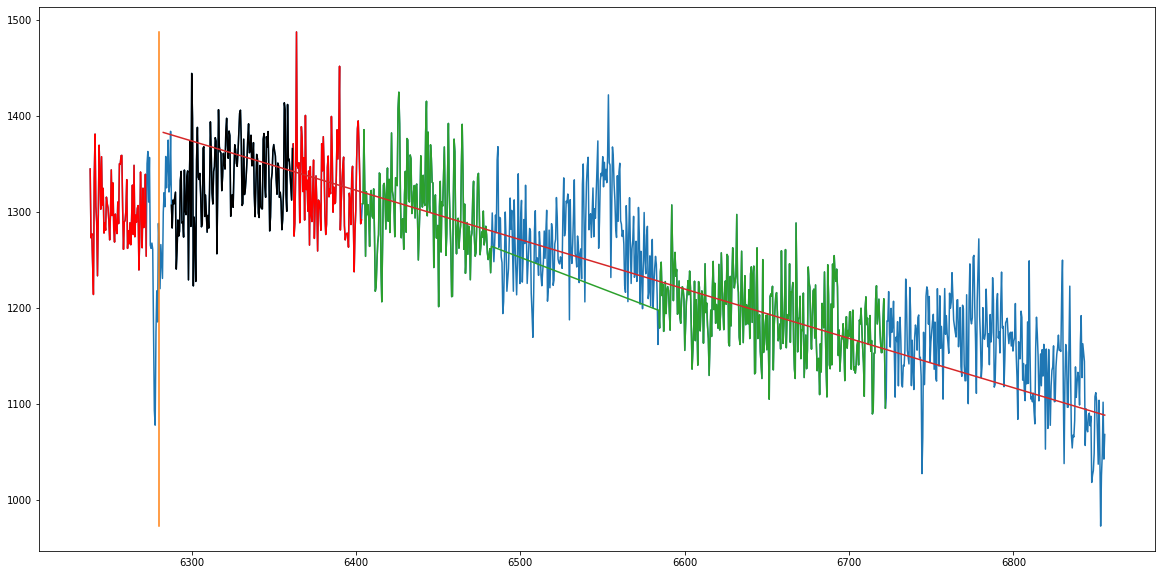

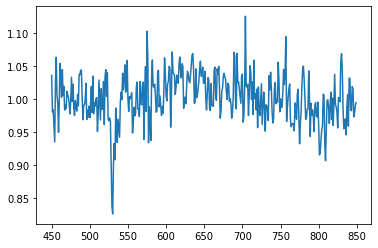

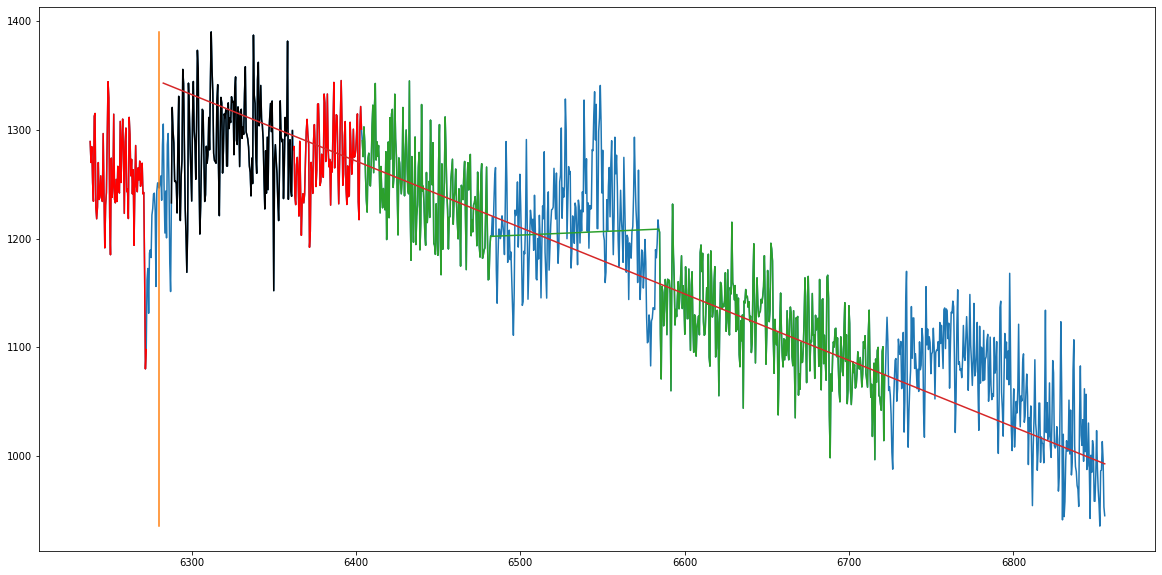

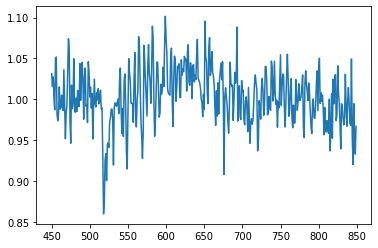

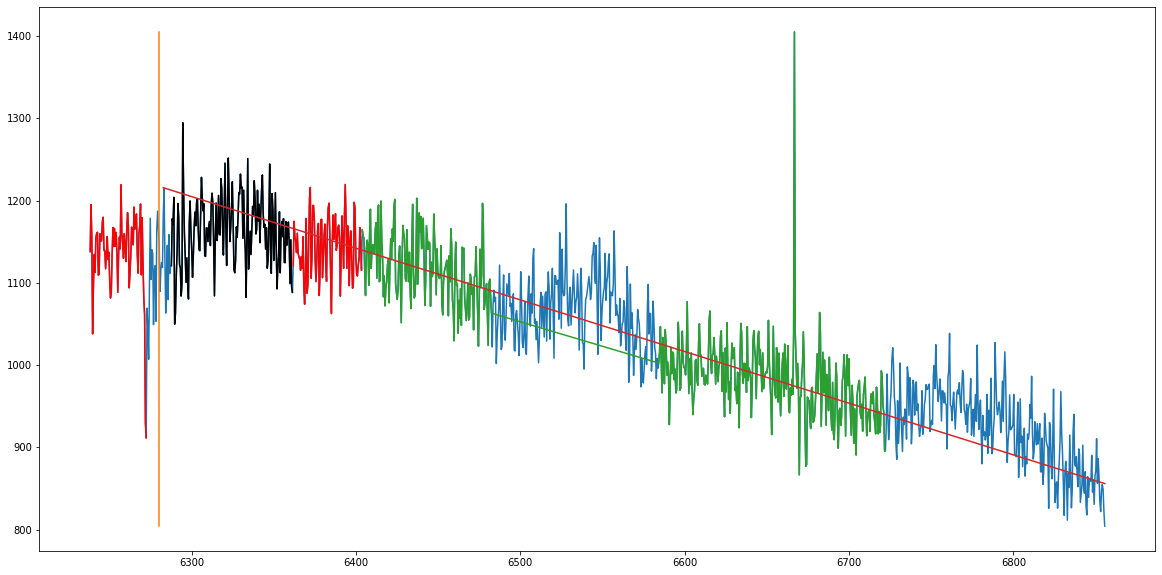

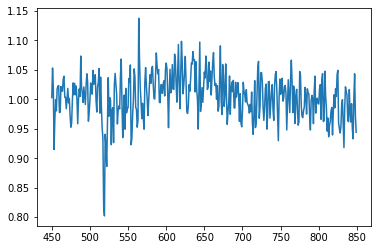

In [8]:
startsR = [startR1,startR2,startR3,startR4,startR5,startR6,startR7,startR8,startR9,startR10,startR11,startR12]
endsR = [endR1,endR2,endR3,endR4,endR5,endR6,endR7,endR8,endR9,endR10,endR11,endR12]
RPi = []
RSP = []
RSM = []
RPiErrors = []
RSPErrors = []
RSMErrors = []
print(dataframeR1['Wavelength'][550])
print(dataframeR1['Wavelength'][700])
print(dataframeR1['Wavelength'][540+460])
print(dataframeR1['Wavelength'][540+660])
print(dataframeR1['Wavelength'][540+860])
print(dataframeR1['Wavelength'][540+1140])
for i in range(12):
    flux = allFluxesR[i]
    plt.figure(figsize=(20,10))
    
    plt.plot(dataframeR1['Wavelength'][450:1700], flux[450-startsR[i]:1700-startsR[i]])
    plt.plot([6280,6280],[min(flux[500-startsR[i]:1700-startsR[i]]),max(flux[500-startsR[i]:1700-startsR[i]])])
    fitx, fity = dataframeR1['Wavelength'][785:945], flux[785-startsR[i]:945-startsR[i]]
    fitx = np.append(fitx,dataframeR1['Wavelength'][1150:1430])
    fity = np.append(fity, flux[1150-startsR[i]:1430-startsR[i]])
    popt, pcov = curve_fit(StraightLine, fitx, fity)
    fluxNormed = flux[540-startsR[i]:1700-startsR[i]]/StraightLine(dataframeR1['Wavelength'][540:1700], *popt)
    #700:785
    plt.plot(dataframeR1['Wavelength'][700:785], flux[700-startsR[i]:785-startsR[i]], c='r')
    plt.plot(dataframeR1['Wavelength'][450:520], flux[450-startsR[i]:520-startsR[i]], c='r')
    plt.plot(dataframeR1['Wavelength'][550:700], flux[550-startsR[i]:700-startsR[i]], c='k')
    RPi.append(area_est(np.linspace(0,199,200), fluxNormed[460:660], 0, 199)-area_est(np.linspace(0,199,200), np.ones_like(fluxNormed[460:660]), 0, 199))
    RSP.append(area_est(np.linspace(0,279,280), fluxNormed[860:1140], 0, 279)-area_est(np.linspace(0,279,280), np.ones_like(fluxNormed[860:1140]), 0, 279))
    plt.plot(fitx, fity)
    plt.plot(dataframeR1['Wavelength'][540:1700], StraightLine(dataframeR1['Wavelength'][540:1700], *popt))
    
    fitSMx, fitSMy = dataframeR1['Wavelength'][450:520], flux[450-startsR[i]:520-startsR[i]]
    fitSMx = np.append(fitSMx,dataframeR1['Wavelength'][700:785])
    fitSMy = np.append(fitSMy, flux[700-startsR[i]:785-startsR[i]])
    popt, pcov = curve_fit(StraightLine, fitSMx, fitSMy)
    fluxNormed = flux[450-startsR[i]:1700-startsR[i]]/StraightLine(dataframeR1['Wavelength'][450:1700], *popt)
    RSM.append(area_est(np.linspace(0,149,150), fluxNormed[100:250], 0, 149)-area_est(np.linspace(0,149,150), np.ones_like(fluxNormed[100:250]), 0, 149))
    plt.show()
    plt.plot(fluxNormed[:400])
    
    
    
    dw = dataframeR1['Wavelength'][700]-dataframeR1['Wavelength'][699]
    thisSNR = SNREst(fity)
    thisEWUn = EWUn(200, dw, thisSNR, np.mean(flux[1000-startsR[i]:1200-startsR[i]]), np.median(fity),len(fity))
    RPiErrors.append(np.sqrt(thisEWUn))
    
    thisEWUn = EWUn(280, dw, thisSNR, np.mean(flux[1400-startsR[i]:1680-startsR[i]]), np.median(fity),len(fity))
    RSPErrors.append(np.sqrt(thisEWUn))
    
    thisEWUn = EWUn(150, dw, thisSNR, np.mean(flux[640-startsR[i]:790-startsR[i]]), np.median(fity),len(fity))
    RSMErrors.append(np.sqrt(thisEWUn))
    
    
    plt.show()

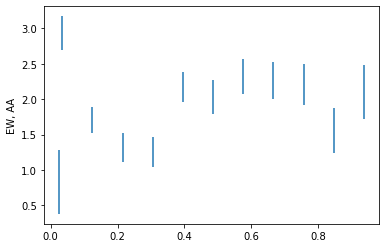

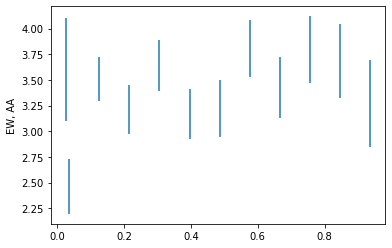

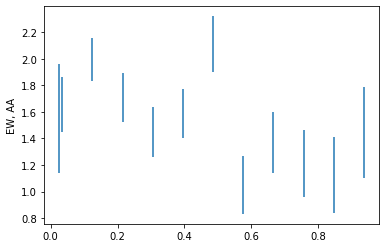

In [9]:
phases = foldMeth(Times,0.08029867)
plt.ylabel('EW, AA')
plt.errorbar(phases, np.array(RPi)*dw,yerr=np.array(RPiErrors), ls='')
plt.show()
plt.ylabel('EW, AA')
plt.errorbar(phases, np.array(RSP)*dw,yerr=np.array(RSPErrors), ls='')
plt.show()
plt.ylabel('EW, AA')
plt.errorbar(phases, np.array(RSM)*dw,yerr=np.array(RSMErrors), ls='')
#plt.plot(Times, np.array(RPi)/200, 'kx')


dat = np.array([Times,np.array(RPi)*dw,np.array(RPiErrors),np.array(RSP)*dw,np.array(RSPErrors),np.array(RSM)*dw,np.array(RSMErrors)])

dat = dat.T

np.savetxt('REWSpecPol.dat', dat, delimiter = '\t')

In [10]:
allFluxes = np.vstack((dataframe1['cleanFlux'], dataframe2['cleanFlux']))
allFluxes = np.vstack((allFluxes, dataframe3['cleanFlux']))
allFluxes = np.vstack((allFluxes, dataframe4['cleanFlux']))
allFluxes = np.vstack((allFluxes, dataframe5['cleanFlux']))
allFluxes = np.vstack((allFluxes, dataframe6['cleanFlux']))
allFluxes = np.vstack((allFluxes, dataframe7['cleanFlux']))
allFluxes = np.vstack((allFluxes, dataframe8['cleanFlux']))
allFluxes = np.vstack((allFluxes, dataframe9['cleanFlux']))
allFluxes = np.vstack((allFluxes, dataframe10['cleanFlux']))
allFluxes = np.vstack((allFluxes, dataframe11['cleanFlux']))
allFluxes = np.vstack((allFluxes, dataframe12['cleanFlux']))

4621.838
4740.840999999999
4782.842000000001
4859.842000000001
4912.343
4954.345


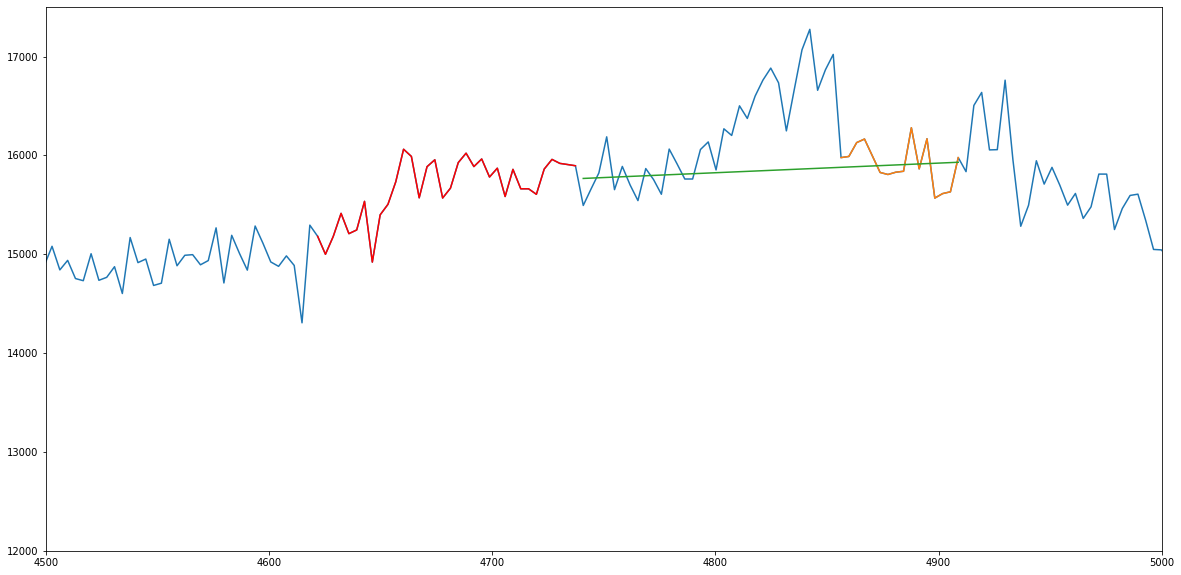

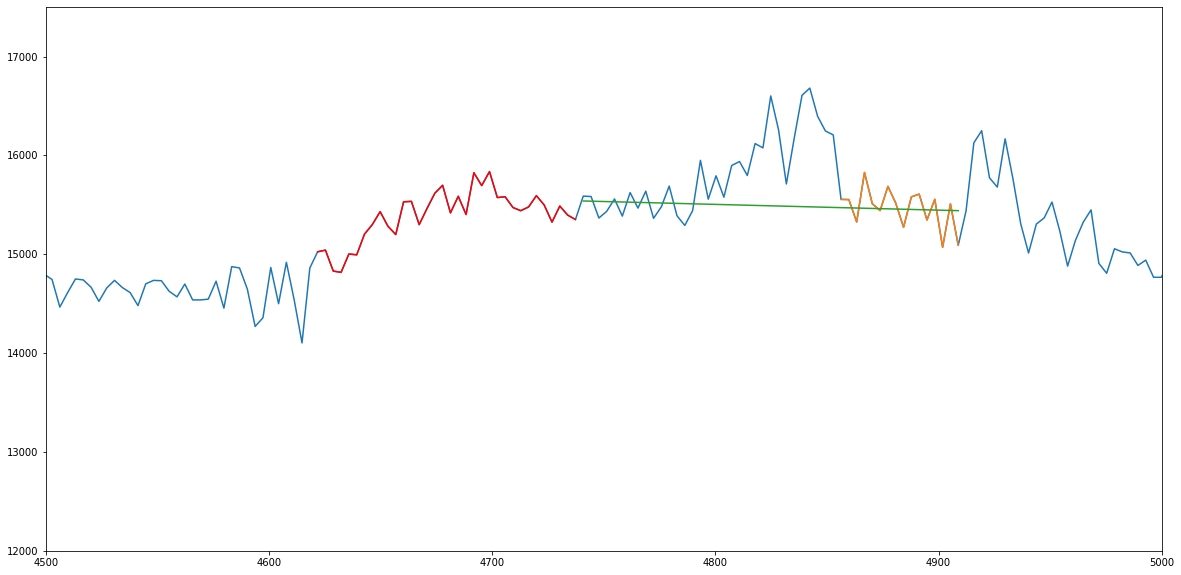

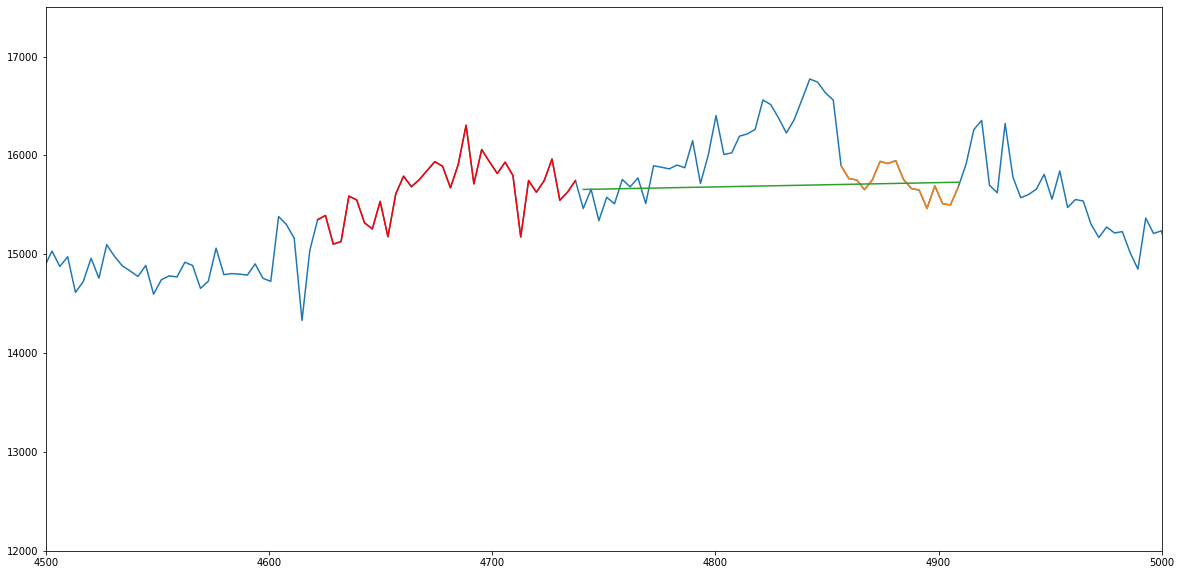

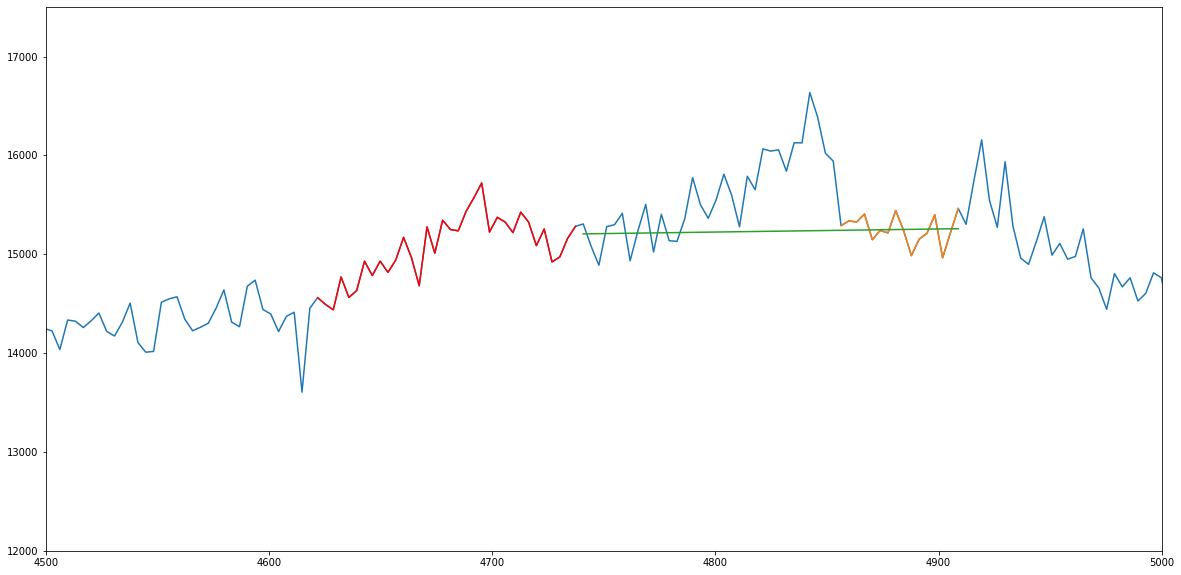

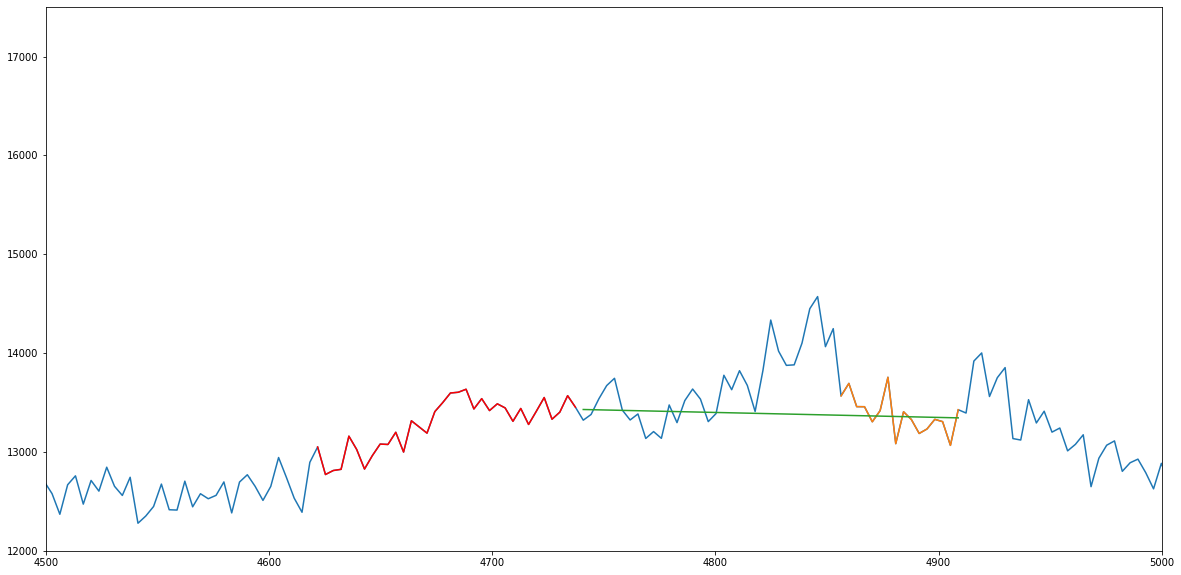

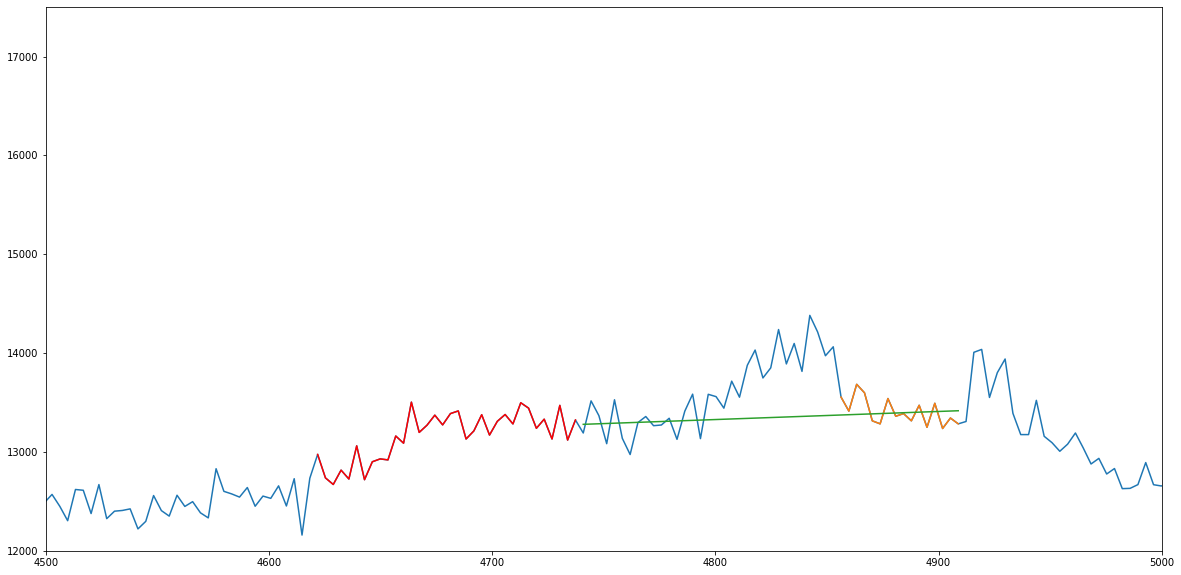

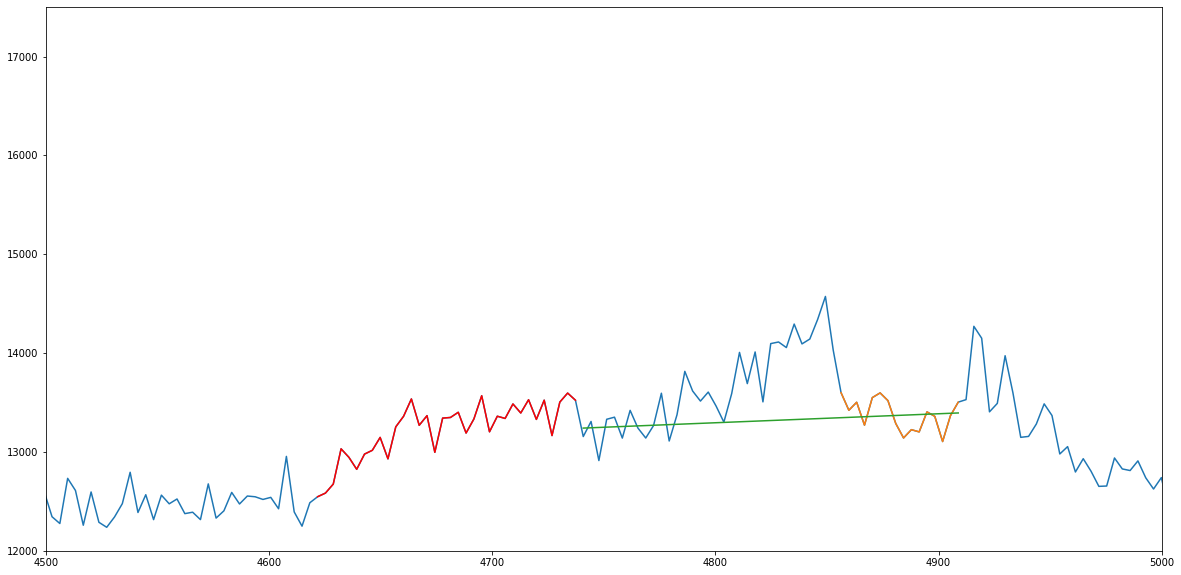

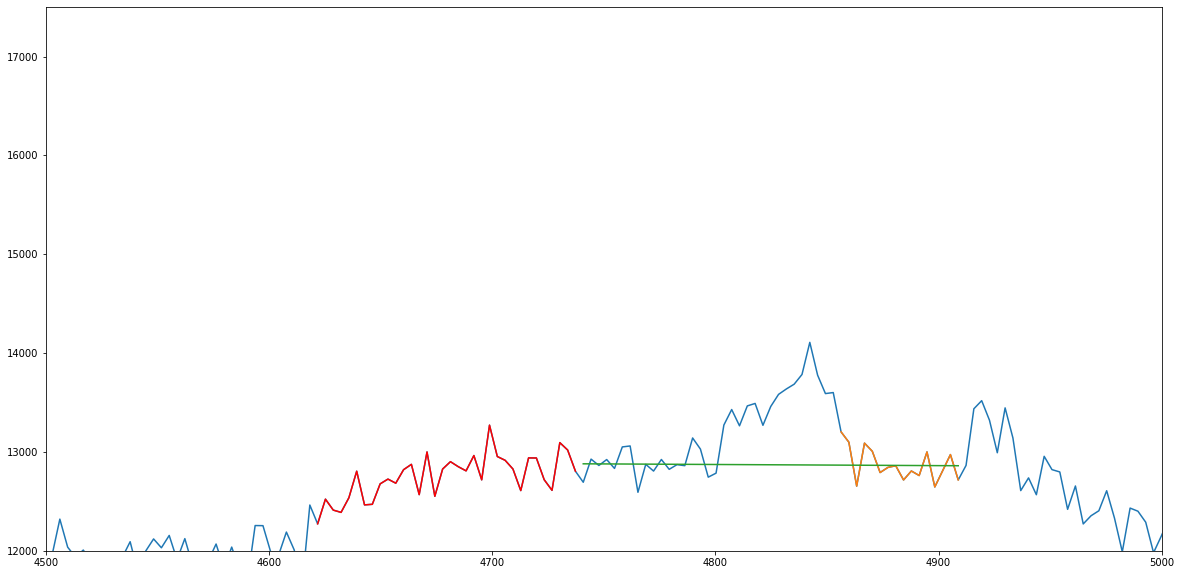

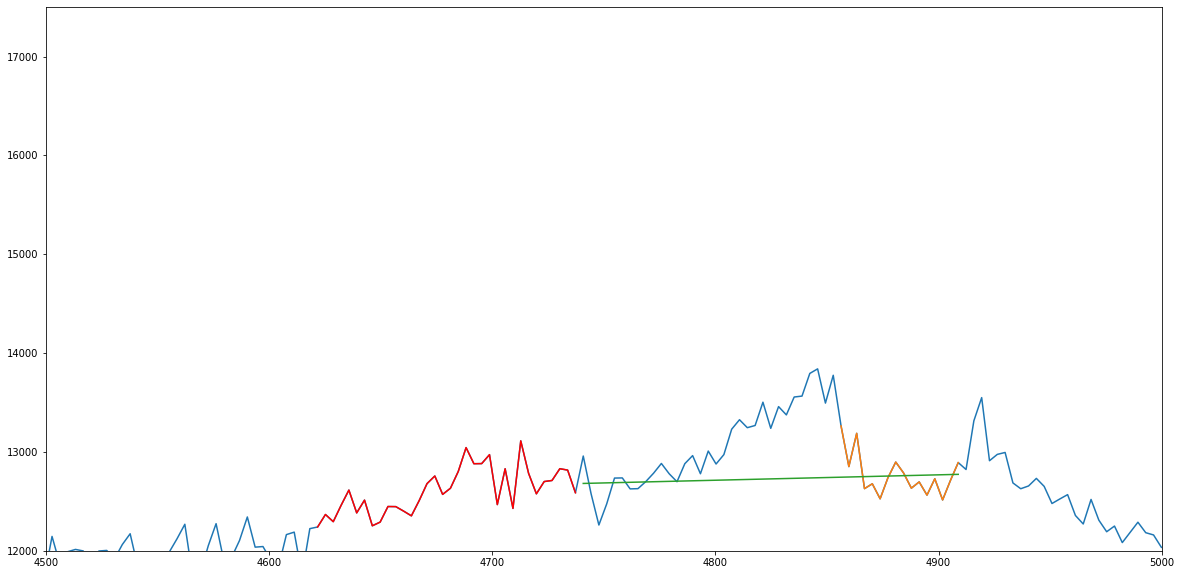

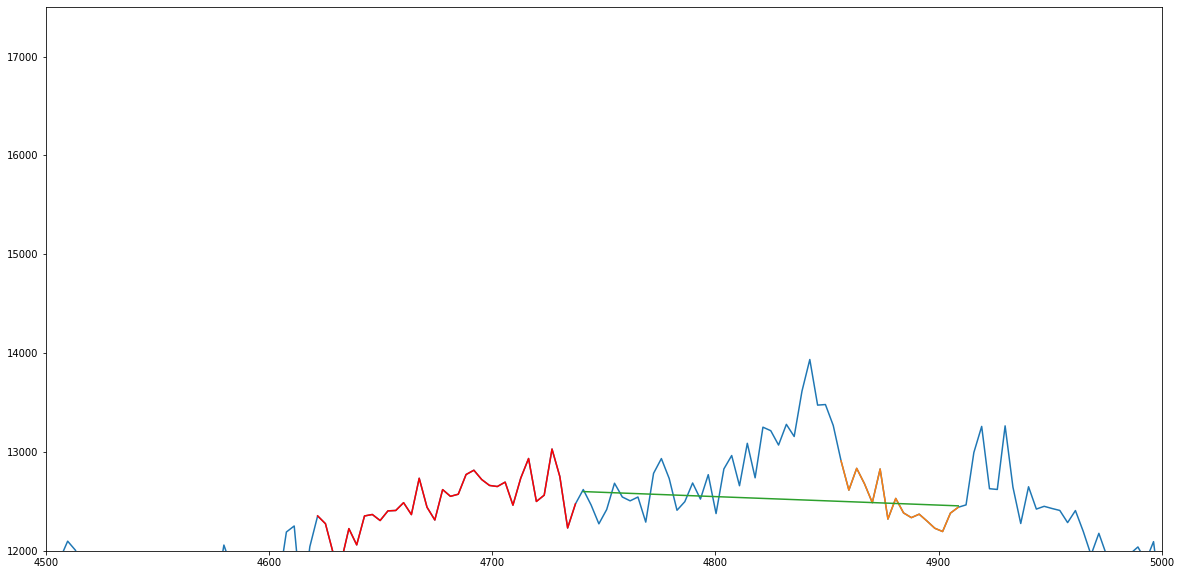

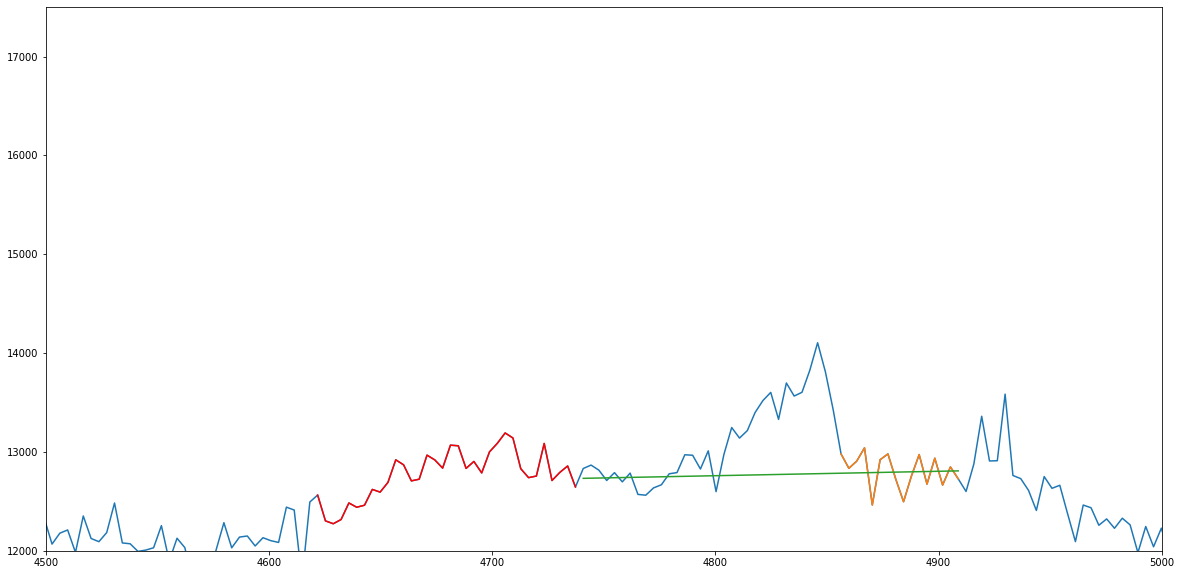

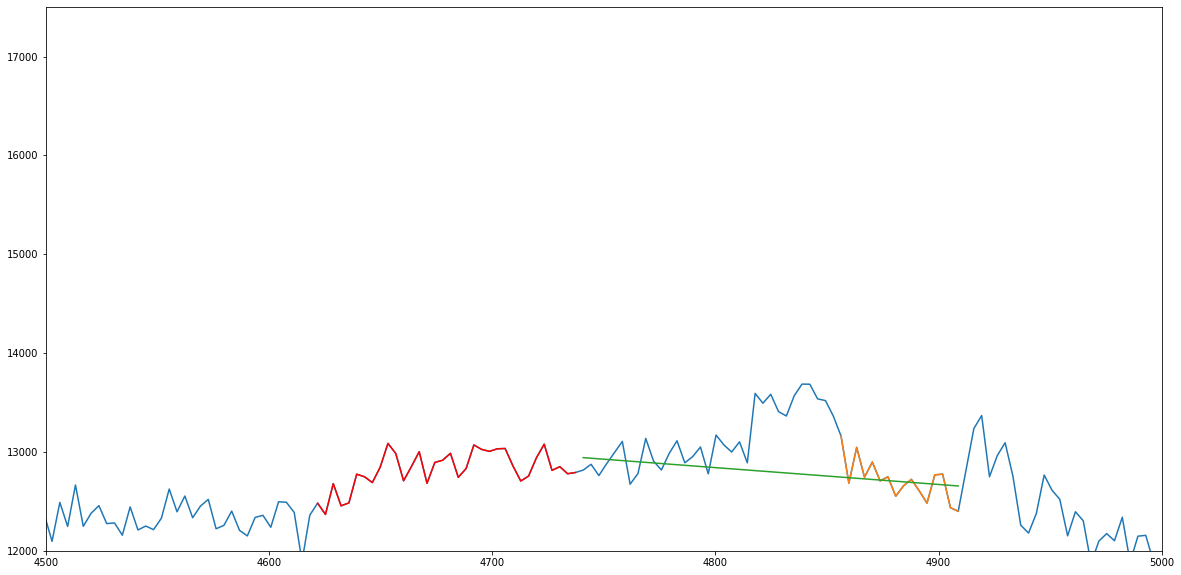

In [11]:
BPi = []
BSP = []
BSM = []
BPIErrors = []
BSPErrors = []
BSMErrors = []
print(dataframe1['Wavelength'][310])
print(dataframe1['Wavelength'][344])
print(dataframe1['Wavelength'][344+12])
print(dataframe1['Wavelength'][344+34])
print(dataframe1['Wavelength'][393])
print(dataframe1['Wavelength'][405])
for i in range(12):
    flux = allFluxes[i]
    plt.figure(figsize=(20,10))
    #4880-4910 4800-4780
    plt.plot(dataframe1['Wavelength'], flux)
    plt.plot(dataframe1['Wavelength'][377:393], flux[377:393])
    plt.plot(dataframe1['Wavelength'][310:344], flux[310:344], c='r')
    fitx, fity = dataframe1['Wavelength'][344:356], flux[344:356]
    fitx = np.append(fitx,dataframe1['Wavelength'][377:393])
    fity = np.append(fity, flux[377:393])
    popt, pcov = curve_fit(StraightLine, fitx, fity)
    fluxNormed = flux[344:393]/StraightLine(dataframe1['Wavelength'][344:393], *popt)
    plt.plot(dataframe1['Wavelength'][344:393], StraightLine(dataframe1['Wavelength'][344:393], *popt))

    BPi.append(area_est(np.linspace(0,21,22), fluxNormed[12:34], 0, 21)-area_est(np.linspace(0,21,22), np.ones_like(fluxNormed[12:34]), 0, 21))
    plt.xlim(4500,5000)
    plt.ylim(12000,17500)

    
    fitx, fity = dataframe1['Wavelength'][377:393], flux[377:393]
    fitx = np.append(fitx,dataframe1['Wavelength'][405:420])
    fity = np.append(fity, flux[405:420])
    popt, pcov = curve_fit(StraightLine, fitx, fity)
    fluxNormed = flux[393:405]/StraightLine(dataframe1['Wavelength'][393:405], *popt)
    BSP.append(area_est(np.linspace(0,11,12), fluxNormed, 0, 11)-area_est(np.linspace(0,11,12), np.ones_like(fluxNormed), 0, 11))
    plt.show()
    
    
    
    fitx, fity = dataframe1['Wavelength'][280:306], flux[280:306]
    fitx = np.append(fitx,dataframe1['Wavelength'][344:356])
    fity = np.append(fity, flux[344:356])
    popt, pcov = curve_fit(StraightLine, fitx, fity)
    fluxNormed = flux[310:344]/StraightLine(dataframe1['Wavelength'][310:344], *popt)
    BSM.append(area_est(np.linspace(0,33,34), fluxNormed, 0, 33)-area_est(np.linspace(0,33,34), np.ones_like(fluxNormed), 0, 33))
    

    dw = dataframe1['Wavelength'][356]-dataframe1['Wavelength'][355]
    thisSNR = SNREst(np.append(flux[344:356],flux[377:393]))
    thisEWUn = EWUn(22, dw, thisSNR, np.mean(flux[356:378]), np.median(np.append(flux[344:356],flux[377:393])),len(np.append(flux[344:356],flux[377:393])))
    BPIErrors.append(np.sqrt(thisEWUn))
    
    
    thisEWUn = EWUn(12, dw, thisSNR, np.mean(flux[393:405]), np.median(np.append(flux[344:356],flux[377:393])),len(np.append(flux[344:356],flux[377:393])))
    BSPErrors.append(np.sqrt(thisEWUn))
    
    
    thisEWUn = EWUn(34, dw, thisSNR, np.mean(flux[310:344]), np.median(np.append(flux[344:356],flux[377:393])),len(np.append(flux[344:356],flux[377:393])))
    BSMErrors.append(np.sqrt(thisEWUn))

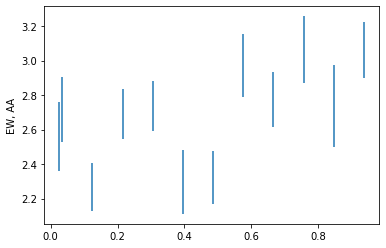

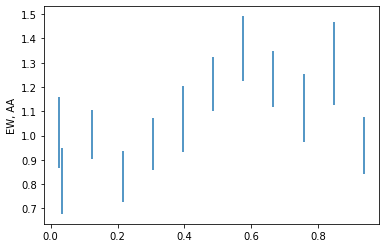

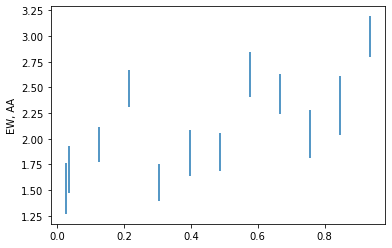

In [13]:
#this is the EW
plt.ylabel('EW, AA')
plt.errorbar(phases, np.array(BPi)*dw,yerr=np.array(BPIErrors),ls='')
plt.show()
plt.ylabel('EW, AA')
plt.errorbar(phases, np.array(BSP)*dw,yerr=np.array(BSPErrors),ls='')
plt.show()
plt.ylabel('EW, AA')
plt.errorbar(phases, np.array(BSM)*dw,yerr=np.array(BSMErrors),ls='')
plt.show()

dat = np.array([Times,np.array(BPi)*dw,np.array(BPIErrors),np.array(BSP)*dw,np.array(BSPErrors),np.array(BSM)*dw,np.array(BSMErrors)])

dat = dat.T

np.savetxt('BEWSpecPol.dat', dat, delimiter = '\t')

In [190]:
print(SNRs)

[174.3678571428572, 125.09999999999998, 132.98214285714286, 131.26785714285708, 145.67500000000004, 120.3607142857143, 143.2642857142857, 120.01785714285721, 143.1714285714285, 173.23571428571435, 120.7785714285714, 151.30357142857136]


In [165]:
np.linspace(0,21,22)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21.])

In [15]:
allFluxesN = np.vstack((dataframe1['cleanFlux']/np.mean(dataframe1['cleanFlux']), dataframe2['cleanFlux']/np.mean(dataframe2['cleanFlux'])))
allFluxesN = np.vstack((allFluxesN, dataframe3['cleanFlux']/np.mean(dataframe3['cleanFlux'])))
allFluxesN = np.vstack((allFluxesN, dataframe4['cleanFlux']/np.mean(dataframe4['cleanFlux'])))
allFluxesN = np.vstack((allFluxesN, dataframe5['cleanFlux']/np.mean(dataframe5['cleanFlux'])))
allFluxesN = np.vstack((allFluxesN, dataframe6['cleanFlux']/np.mean(dataframe6['cleanFlux'])))
allFluxesN = np.vstack((allFluxesN, dataframe7['cleanFlux']/np.mean(dataframe7['cleanFlux'])))
allFluxesN = np.vstack((allFluxesN, dataframe8['cleanFlux']/np.mean(dataframe8['cleanFlux'])))
allFluxesN = np.vstack((allFluxesN, dataframe9['cleanFlux']/np.mean(dataframe9['cleanFlux'])))
allFluxesN = np.vstack((allFluxesN, dataframe10['cleanFlux']/np.mean(dataframe10['cleanFlux'])))
allFluxesN = np.vstack((allFluxesN, dataframe11['cleanFlux']/np.mean(dataframe11['cleanFlux'])))
allFluxesN = np.vstack((allFluxesN, dataframe12['cleanFlux']/np.mean(dataframe12['cleanFlux'])))

In [16]:
dataframe1['Wavelength'][304:419] #4600-5000 304-418

304    4600.838
305    4604.338
306    4607.838
307    4611.338
308    4614.838
         ...   
414    4985.846
415    4989.346
416    4992.846
417    4996.346
418    4999.846
Name: Wavelength, Length: 115, dtype: float64

In [17]:
allFluxesNC = np.vstack((dataframe1['cleanFlux'][304:419]/np.mean(dataframe1['cleanFlux'][304:419]), dataframe2['cleanFlux'][304:419]/np.mean(dataframe2['cleanFlux'][304:419])))
allFluxesNC = np.vstack((allFluxesNC, dataframe3['cleanFlux'][304:419]/np.mean(dataframe3['cleanFlux'][304:419])))
allFluxesNC = np.vstack((allFluxesNC, dataframe4['cleanFlux'][304:419]/np.mean(dataframe4['cleanFlux'][304:419])))
allFluxesNC = np.vstack((allFluxesNC, dataframe5['cleanFlux'][304:419]/np.mean(dataframe5['cleanFlux'][304:419])))
allFluxesNC = np.vstack((allFluxesNC, dataframe6['cleanFlux'][304:419]/np.mean(dataframe6['cleanFlux'][304:419])))
allFluxesNC = np.vstack((allFluxesNC, dataframe7['cleanFlux'][304:419]/np.mean(dataframe7['cleanFlux'][304:419])))
allFluxesNC = np.vstack((allFluxesNC, dataframe8['cleanFlux'][304:419]/np.mean(dataframe8['cleanFlux'][304:419])))
allFluxesNC = np.vstack((allFluxesNC, dataframe9['cleanFlux'][304:419]/np.mean(dataframe9['cleanFlux'][304:419])))
allFluxesNC = np.vstack((allFluxesNC, dataframe10['cleanFlux'][304:419]/np.mean(dataframe10['cleanFlux'][304:419])))
allFluxesNC = np.vstack((allFluxesNC, dataframe11['cleanFlux'][304:419]/np.mean(dataframe11['cleanFlux'][304:419])))
allFluxesNC = np.vstack((allFluxesNC, dataframe12['cleanFlux'][304:419]/np.mean(dataframe12['cleanFlux'][304:419])))

In [18]:
blueTimes = [2458766.316477858,2458766.323699965,2458766.330933671,2458766.338178977,
             2458766.345528382,2458766.352657989,2458766.359891695,2458766.367125401,
             2458766.374347507,2458766.381581212,2458766.388814918,2458766.396060123]
phases = foldMeth(blueTimes, 0.08029870250017346)

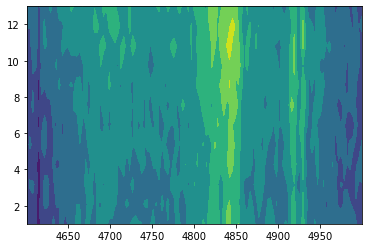

In [19]:
X,Y = np.meshgrid(dataframe1['Wavelength'][304:419], np.linspace(1,13,12))
plt.contourf(X,Y,allFluxesN[:,304:419])

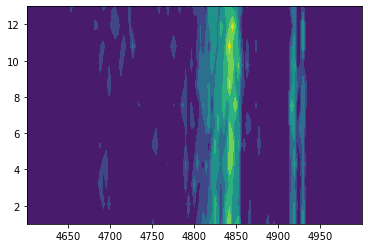

In [20]:
X,Y = np.meshgrid(dataframe1['Wavelength'][304:419], np.linspace(1,13,12))
plt.contourf(X,Y,np.clip(allFluxesNC,1.01,1.1))

In [21]:
allVNC = np.vstack((dataframe1['V'][304:419]/np.mean(dataframe1['V'][304:419]), dataframe2['V'][304:419]/np.mean(dataframe2['V'][304:419])))
allVNC = np.vstack((allVNC, dataframe3['V'][304:419]/np.mean(dataframe3['V'][304:419])))
allVNC = np.vstack((allVNC, dataframe4['V'][304:419]/np.mean(dataframe4['V'][304:419])))
allVNC = np.vstack((allVNC, dataframe5['V'][304:419]/np.mean(dataframe5['V'][304:419])))
allVNC = np.vstack((allVNC, dataframe6['V'][304:419]/np.mean(dataframe6['V'][304:419])))
allVNC = np.vstack((allVNC, dataframe7['V'][304:419]/np.mean(dataframe7['V'][304:419])))
allVNC = np.vstack((allVNC, dataframe8['V'][304:419]/np.mean(dataframe8['V'][304:419])))
allVNC = np.vstack((allVNC, dataframe9['V'][304:419]/np.mean(dataframe9['V'][304:419])))
allVNC = np.vstack((allVNC, dataframe10['V'][304:419]/np.mean(dataframe10['V'][304:419])))
allVNC = np.vstack((allVNC, dataframe11['V'][304:419]/np.mean(dataframe11['V'][304:419])))
allVNC = np.vstack((allVNC, dataframe12['V'][304:419]/np.mean(dataframe12['V'][304:419])))

In [22]:
allVC = np.vstack((dataframe1['V'][304:419], dataframe2['V'][304:419]))
allVC = np.vstack((allVC, dataframe3['V'][304:419]))
allVC = np.vstack((allVC, dataframe4['V'][304:419]))
allVC = np.vstack((allVC, dataframe5['V'][304:419]))
allVC = np.vstack((allVC, dataframe6['V'][304:419]))
allVC = np.vstack((allVC, dataframe7['V'][304:419]))
allVC = np.vstack((allVC, dataframe8['V'][304:419]))
allVC = np.vstack((allVC, dataframe9['V'][304:419]))
allVC = np.vstack((allVC, dataframe10['V'][304:419]))
allVC = np.vstack((allVC, dataframe11['V'][304:419]))
allVC = np.vstack((allVC, dataframe12['V'][304:419]))

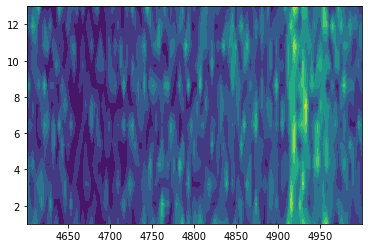

In [23]:
X,Y = np.meshgrid(dataframe1['Wavelength'][304:419], np.linspace(1,13,12))
plt.contourf(X,Y,np.clip(allVC,-0.01,0.05))


In [24]:
print(phases)

[0.6419235  0.73186402 0.82194899 0.91217841 0.00370424 0.09249281
 0.18257777 0.27266274 0.36260325 0.4526882  0.54277317 0.63300134]


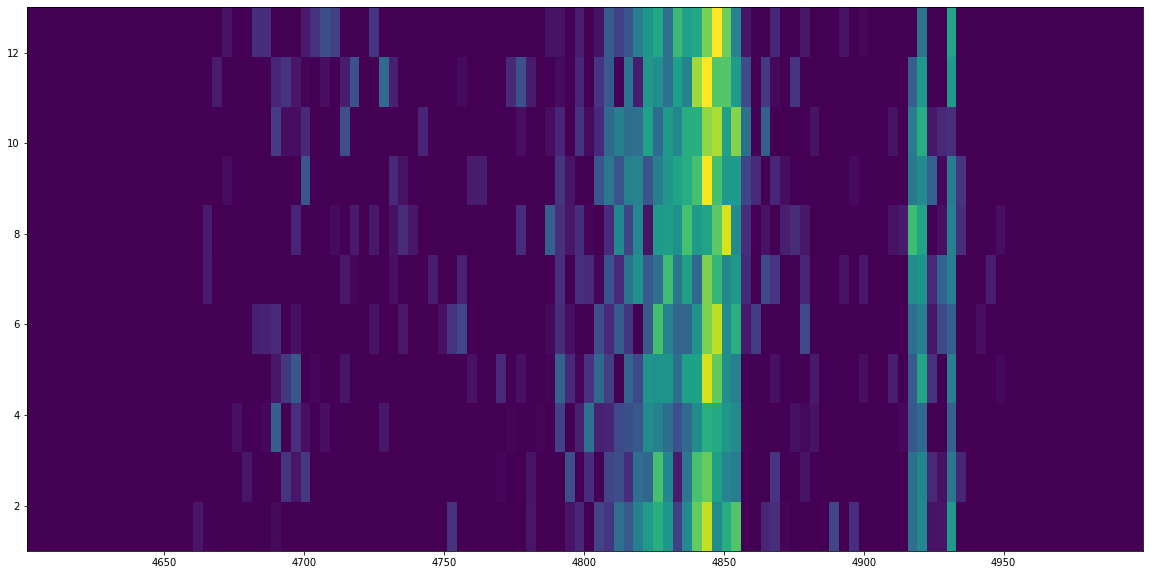

In [26]:
plt.figure(figsize=(20,10))
X,Y = np.meshgrid(dataframe1['Wavelength'][304:419], np.linspace(1,13,12))
plt.pcolormesh(X,Y,np.clip(allFluxesNC,1.01,1.1))
#plt.savefig('specpolFlux.pdf')

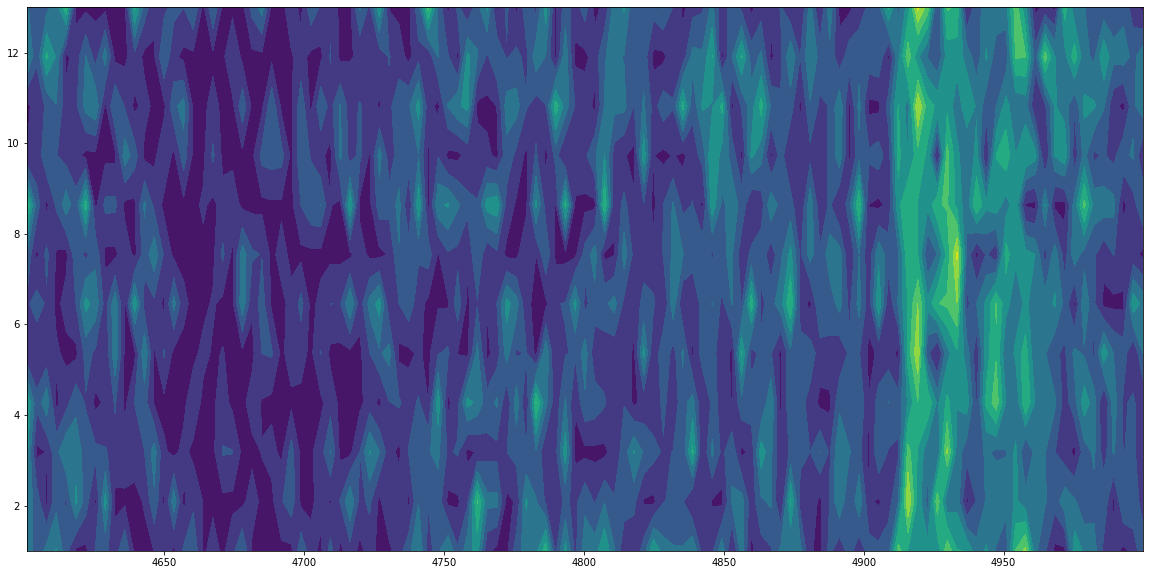

In [125]:
plt.figure(figsize=(20,10))
X,Y = np.meshgrid(dataframe1['Wavelength'][304:419], np.linspace(1,13,12))
plt.contourf(X,Y,np.clip(allVC,-0.01,0.05))
plt.savefig('specpolVI.pdf')

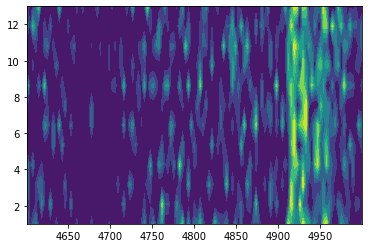

In [100]:
X,Y = np.meshgrid(dataframe1['Wavelength'][304:419], np.linspace(1,13,12))
plt.contourf(X,Y,np.clip(allVC,0,0.03))


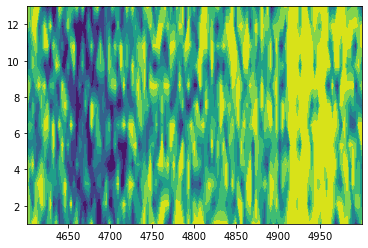

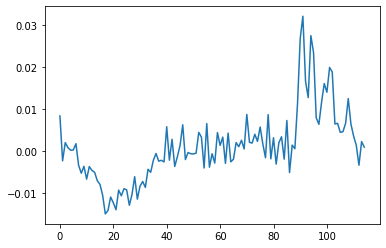

In [120]:
X,Y = np.meshgrid(dataframe1['Wavelength'][304:419], np.linspace(1,13,12))
plt.contourf(X,Y,np.clip(allVC,-0.02,0.01))
plt.show()
plt.plot(allVC.mean(axis=0))
#plt.hist(dataframe1['Wavelength'][304:419], allVC.mean(axis=0))

(11000, 17500)

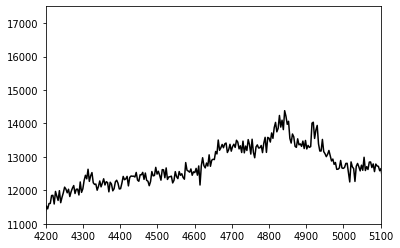

In [82]:
plt.plot(dataframe['Wavelength'], dataframe['I'], c='k') #first column is black line # flux
#plt.plot(dataframe['Wavelength'], dataframe['Q']/dataframe['V'], c='r')
plt.xlim(4200,5100)
plt.ylim(11000,17500)
#flux clean

(4200, 5100)

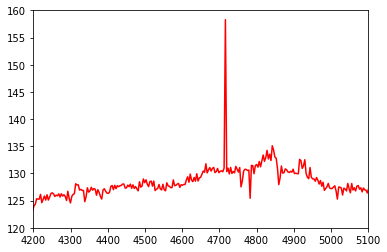

In [69]:
plt.plot(dataframe['Wavelength'], dataframe['Q'], c='r') #dirty flux; divide by this to get clean flux dataframe['V']
plt.ylim(120,160)
plt.xlim(4200,5100)
#flux raw

(4200, 5100)

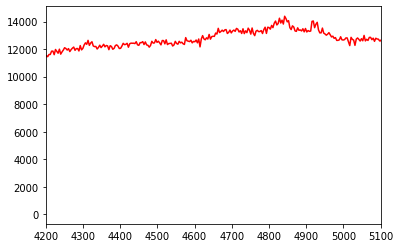

In [80]:
plt.plot(dataframe['Wavelength'], dataframe['Q']/dataframe['V'], c='r')
plt.xlim(4200,5100)
#plt.ylim(1.2,2)

(4200, 5100)

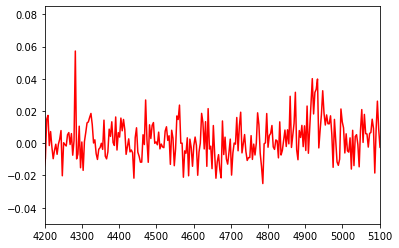

In [67]:
plt.plot(dataframe['Wavelength'], dataframe['U'], c='r')#red line 
plt.ylim(-0.05,0.085) 
plt.xlim(4200,5100)

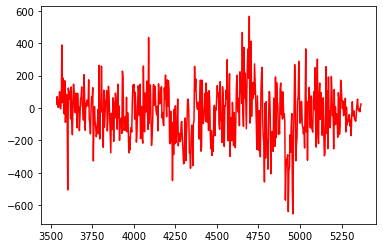

In [16]:

plt.plot(dataframe1['Wavelength'], -1*dataframe1['V']*dataframe1['cleanFlux'], c='r') #V

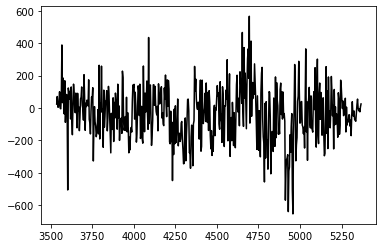

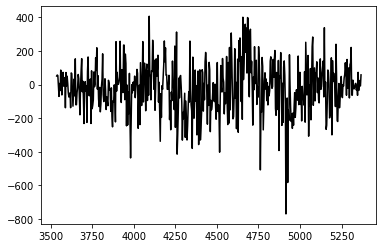

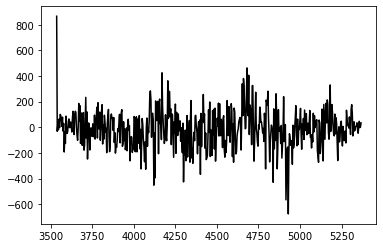

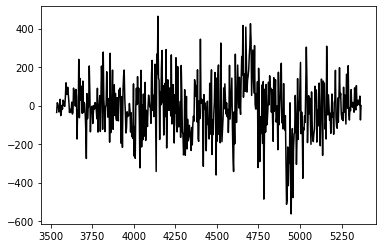

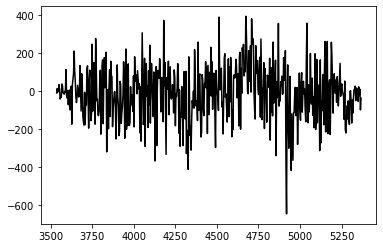

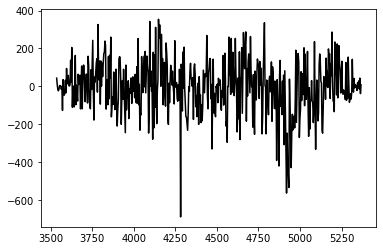

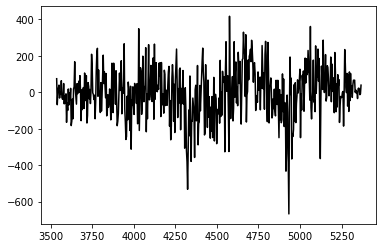

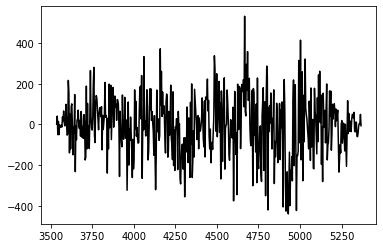

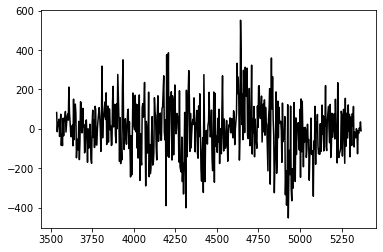

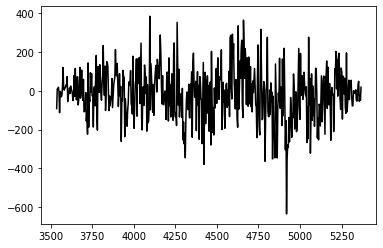

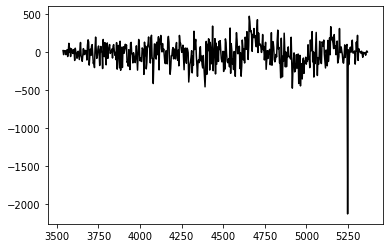

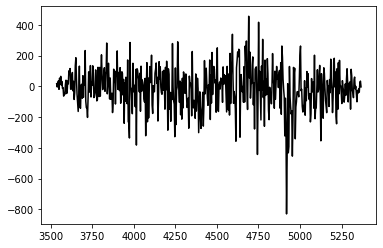

In [7]:
VPercent = -1*dataframe1['V']*dataframe1['cleanFlux']
plt.plot(dataframe1['Wavelength'], -1*dataframe1['V']*dataframe1['cleanFlux'], c='k')
plt.show()
VPercent = np.vstack((VPercent, -1*dataframe2['V']*dataframe2['cleanFlux']))
VPercent = np.vstack((VPercent, -1*dataframe3['V']*dataframe3['cleanFlux']))
VPercent = np.vstack((VPercent, -1*dataframe4['V']*dataframe4['cleanFlux']))
VPercent = np.vstack((VPercent, -1*dataframe5['V']*dataframe5['cleanFlux']))
VPercent = np.vstack((VPercent, -1*dataframe6['V']*dataframe6['cleanFlux']))
VPercent = np.vstack((VPercent, -1*dataframe7['V']*dataframe7['cleanFlux']))
VPercent = np.vstack((VPercent, -1*dataframe8['V']*dataframe8['cleanFlux']))
VPercent = np.vstack((VPercent, -1*dataframe9['V']*dataframe9['cleanFlux']))
VPercent = np.vstack((VPercent, -1*dataframe10['V']*dataframe10['cleanFlux']))
VPercent = np.vstack((VPercent, -1*dataframe11['V']*dataframe11['cleanFlux']))
VPercent = np.vstack((VPercent, -1*dataframe12['V']*dataframe12['cleanFlux']))
plt.plot(dataframe2['Wavelength'], -1*dataframe2['V']*dataframe2['cleanFlux'], c='k')
plt.show()
plt.plot(dataframe3['Wavelength'], -1*dataframe3['V']*dataframe3['cleanFlux'], c='k')
plt.show()
plt.plot(dataframe4['Wavelength'], -1*dataframe4['V']*dataframe4['cleanFlux'], c='k')
plt.show()
plt.plot(dataframe5['Wavelength'], -1*dataframe5['V']*dataframe5['cleanFlux'], c='k')
plt.show()
plt.plot(dataframe6['Wavelength'], -1*dataframe6['V']*dataframe6['cleanFlux'], c='k')
plt.show()
plt.plot(dataframe7['Wavelength'], -1*dataframe7['V']*dataframe7['cleanFlux'], c='k')
plt.show()
plt.plot(dataframe8['Wavelength'], -1*dataframe8['V']*dataframe8['cleanFlux'], c='k')
plt.show()
plt.plot(dataframe9['Wavelength'], -1*dataframe9['V']*dataframe9['cleanFlux'], c='k')
plt.show()
plt.plot(dataframe10['Wavelength'], -1*dataframe10['V']*dataframe10['cleanFlux'], c='k')
plt.show()
plt.plot(dataframe11['Wavelength'], -1*dataframe11['V']*dataframe11['cleanFlux'], c='k')
plt.show()
plt.plot(dataframe12['Wavelength'], -1*dataframe12['V']*dataframe12['cleanFlux'], c='k')
plt.show()

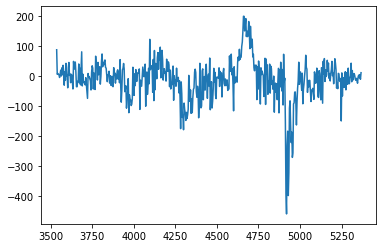

(4500, 5100)

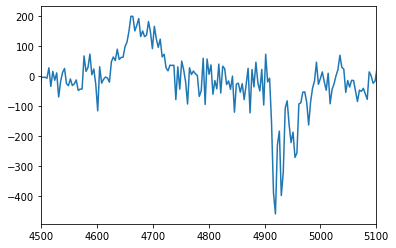

In [11]:
plt.plot(dataframe9['Wavelength'],np.average(VPercent,axis=0))
plt.show()
plt.plot(dataframe9['Wavelength'],np.average(VPercent,axis=0))
plt.xlim(4500,5100)

In [20]:
VStack = np.vstack((-1*dataframe1['V']*dataframe1['cleanFlux'], -1*dataframe2['V']*dataframe2['cleanFlux']))
VStack = np.vstack((VStack, -1*dataframe3['V']*dataframe3['cleanFlux']))
VStack = np.vstack((VStack, -1*dataframe4['V']*dataframe4['cleanFlux']))
VStack = np.vstack((VStack, -1*dataframe5['V']*dataframe5['cleanFlux']))
VStack = np.vstack((VStack, -1*dataframe6['V']*dataframe6['cleanFlux']))
VStack = np.vstack((VStack, -1*dataframe7['V']*dataframe7['cleanFlux']))
VStack = np.vstack((VStack, -1*dataframe8['V']*dataframe8['cleanFlux']))
VStack = np.vstack((VStack, -1*dataframe9['V']*dataframe9['cleanFlux']))
VStack = np.vstack((VStack, -1*dataframe10['V']*dataframe10['cleanFlux']))
VStack = np.vstack((VStack, -1*dataframe11['V']*dataframe11['cleanFlux']))
VStack = np.vstack((VStack, -1*dataframe12['V']*dataframe12['cleanFlux']))

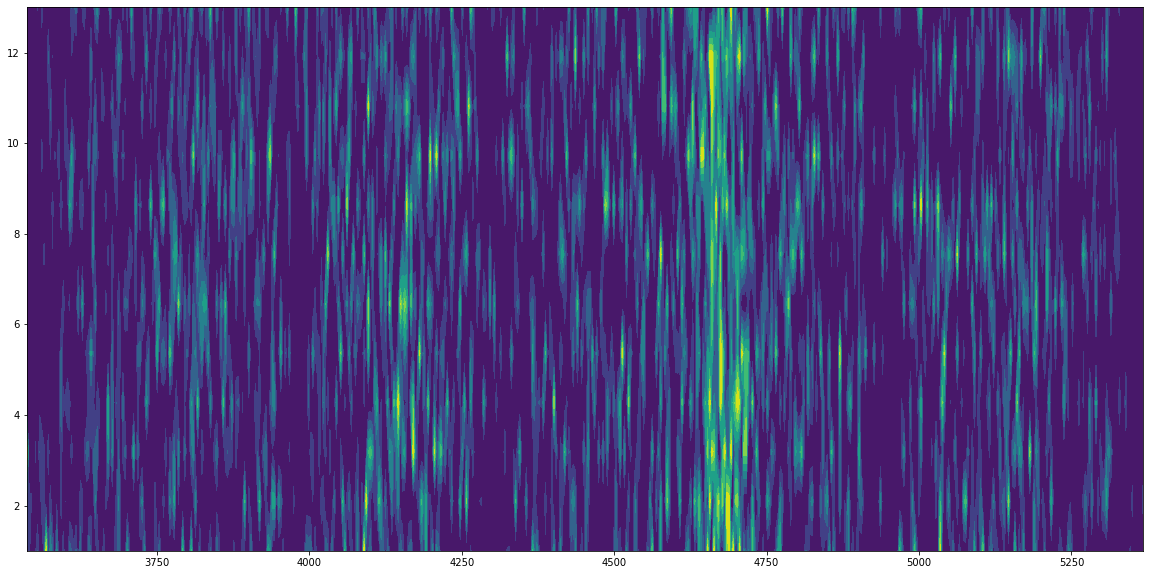

In [22]:
plt.figure(figsize=(20,10))
X,Y = np.meshgrid(dataframe1['Wavelength'], np.linspace(1,13,12))
plt.contourf(X,Y,np.clip(VStack, 0, 400))
#plt.savefig('specpolVI.pdf')

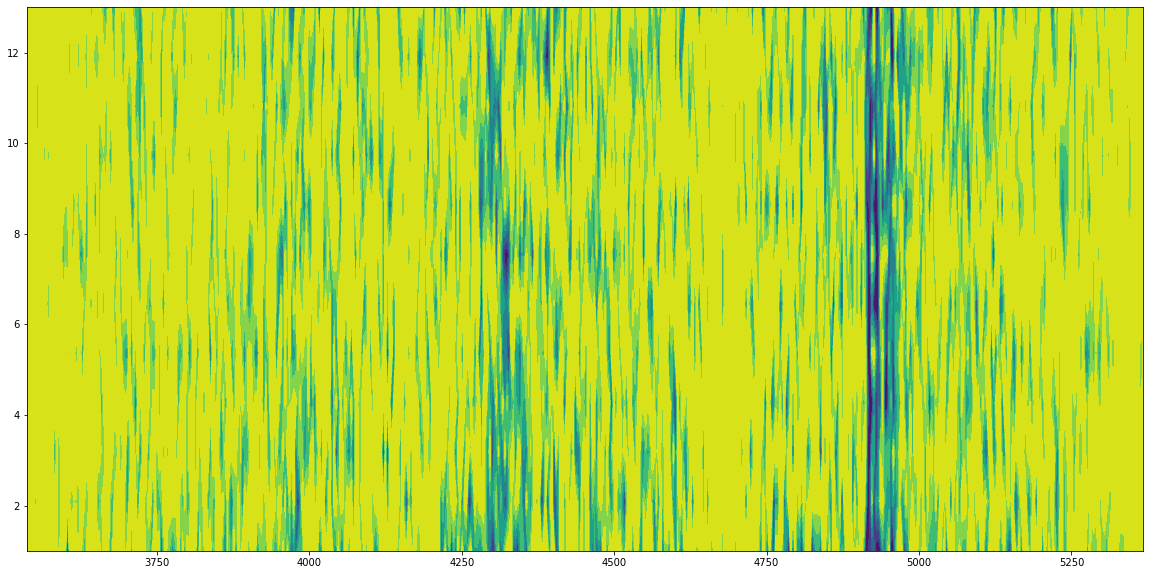

In [23]:
plt.figure(figsize=(20,10))
X,Y = np.meshgrid(dataframe1['Wavelength'], np.linspace(1,13,12))
plt.contourf(X,Y,np.clip(VStack, -400, 0))

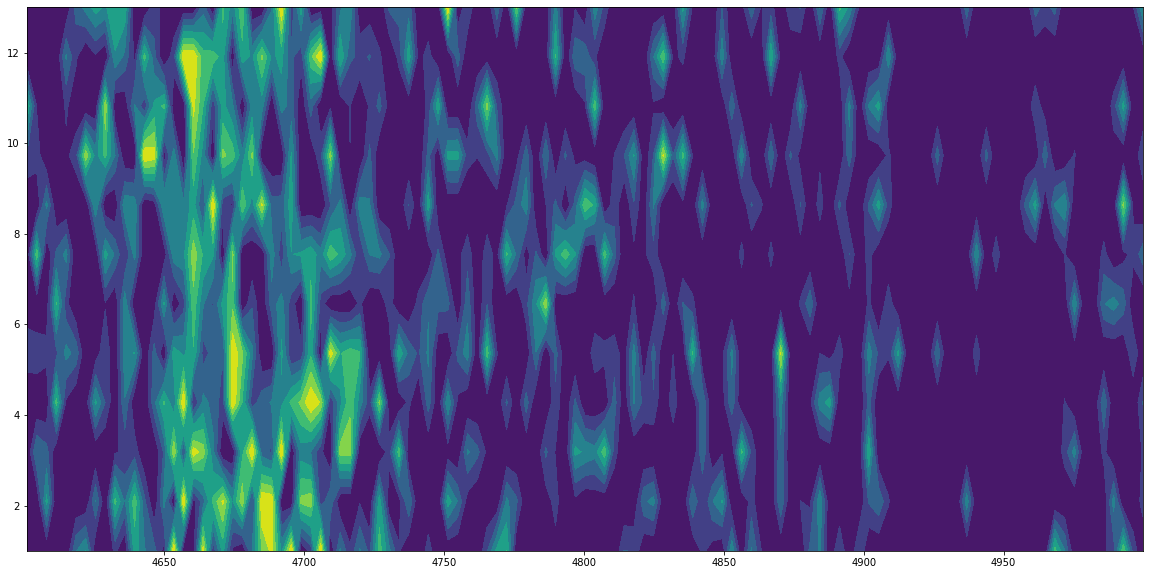

In [24]:
#[304:419]

plt.figure(figsize=(20,10))
X,Y = np.meshgrid(dataframe1['Wavelength'][304:419], np.linspace(1,13,12))
plt.contourf(X,Y,np.clip(VStack[:,304:419], 0, 400))
#plt.savefig('specpolVI.pdf')

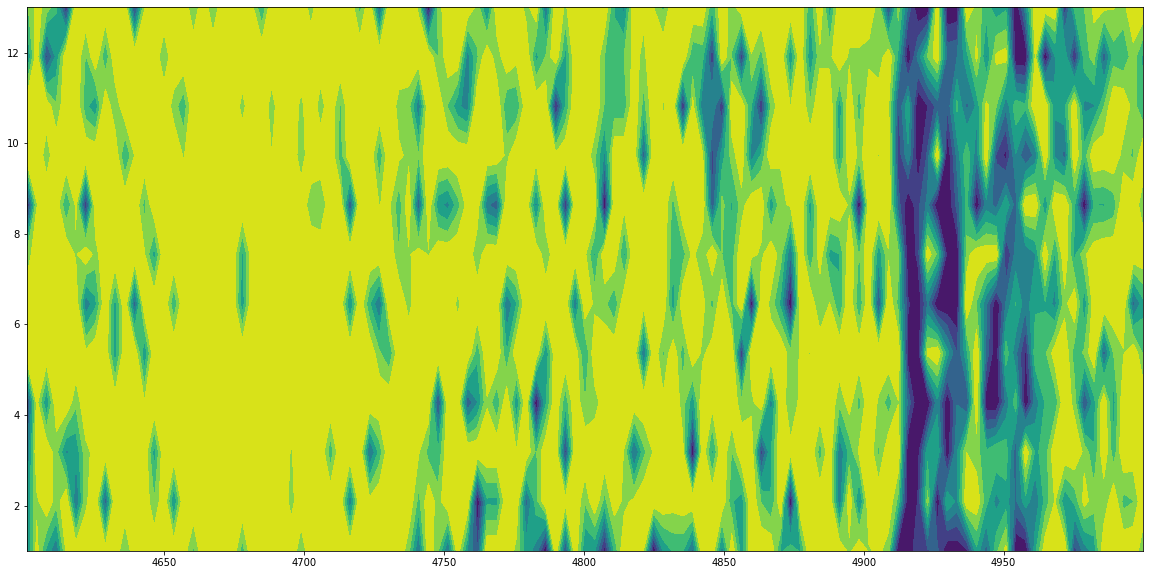

In [25]:
plt.figure(figsize=(20,10))
X,Y = np.meshgrid(dataframe1['Wavelength'][304:419], np.linspace(1,13,12))
plt.contourf(X,Y,np.clip(VStack[:,304:419], -400, 0))

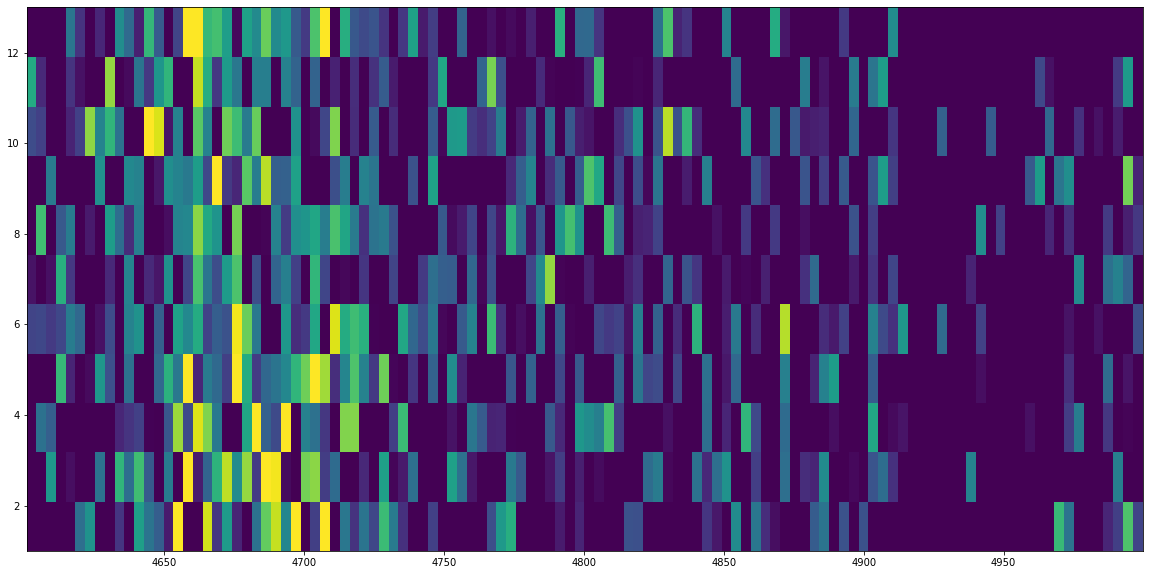

In [27]:
#[304:419]

plt.figure(figsize=(20,10))
X,Y = np.meshgrid(dataframe1['Wavelength'][304:419], np.linspace(1,13,12))
plt.pcolormesh(X,Y,np.clip(VStack[:,304:419], 0, 400))
#plt.savefig('specpolVI.pdf')

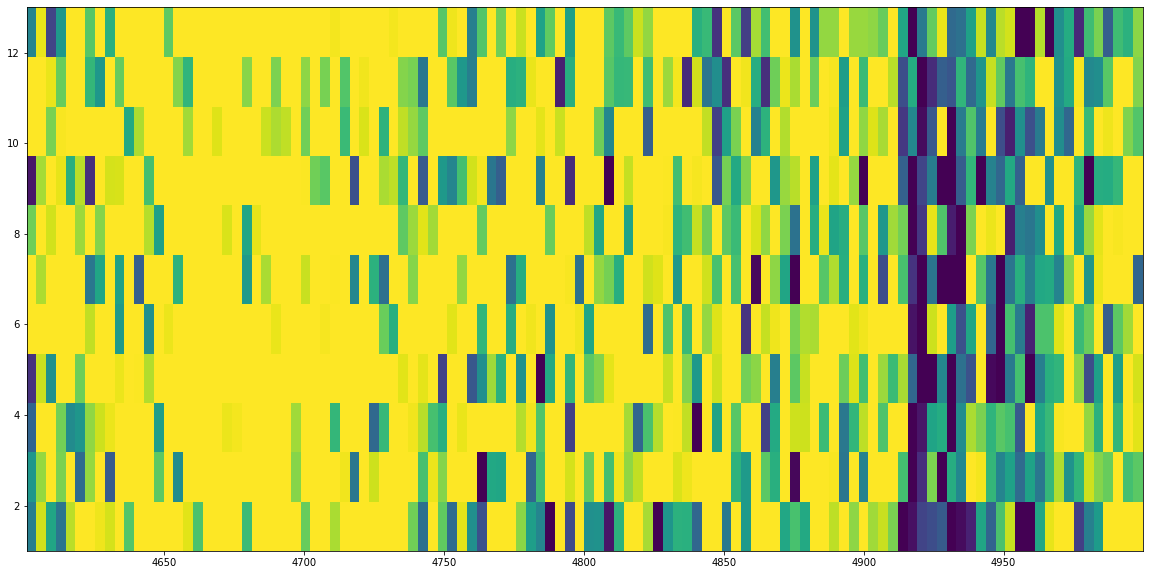

In [28]:
plt.figure(figsize=(20,10))
X,Y = np.meshgrid(dataframe1['Wavelength'][304:419], np.linspace(1,13,12))
plt.pcolormesh(X,Y,np.clip(VStack[:,304:419], -400, 0))

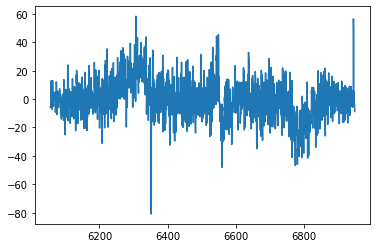

In [12]:
allFluxesR = np.vstack((-1*dataframeR1['I'][startR1:endR1]*dataframeR1['V/I'][startR1:endR1], -1*dataframeR2['I'][startR2:endR2]*dataframeR2['V/I'][startR2:endR2]))
allFluxesR = np.vstack((allFluxesR, -1*dataframeR3['I'][startR3:endR3]*dataframeR3['V/I'][startR3:endR3]))
allFluxesR = np.vstack((allFluxesR, -1*dataframeR4['I'][startR4:endR4]*dataframeR4['V/I'][startR4:endR4]))
allFluxesR = np.vstack((allFluxesR, -1*dataframeR5['I'][startR5:endR5]*dataframeR5['V/I'][startR5:endR5]))
allFluxesR = np.vstack((allFluxesR, -1*dataframeR6['I'][startR6:endR6]*dataframeR6['V/I'][startR6:endR6]))
allFluxesR = np.vstack((allFluxesR, -1*dataframeR7['I'][startR7:endR7]*dataframeR7['V/I'][startR7:endR7]))
allFluxesR = np.vstack((allFluxesR, -1*dataframeR8['I'][startR8:endR8]*dataframeR8['V/I'][startR8:endR8]))
allFluxesR = np.vstack((allFluxesR, -1*dataframeR9['I'][startR9:endR9]*dataframeR9['V/I'][startR9:endR9]))
allFluxesR = np.vstack((allFluxesR, -1*dataframeR10['I'][startR10:endR10]*dataframeR10['V/I'][startR10:endR10]))
allFluxesR = np.vstack((allFluxesR, -1*dataframeR11['I'][startR11:endR11]*dataframeR11['V/I'][startR11:endR11]))
allFluxesR = np.vstack((allFluxesR, -1*dataframeR12['I'][startR12:endR12]*dataframeR12['V/I'][startR12:endR12]))

plt.plot(dataframeR1['Wavelength'][startR1:endR1],np.average(allFluxesR,axis=0))
plt.show()

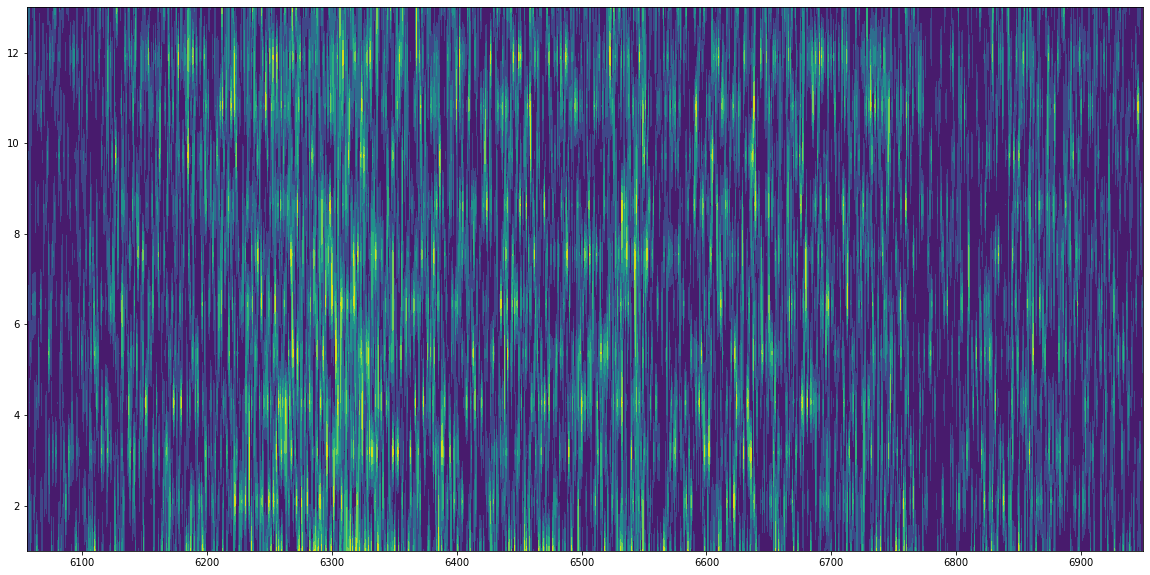

In [38]:
plt.figure(figsize=(20,10))
X,Y = np.meshgrid(dataframeR1['Wavelength'][startR1:endR1], np.linspace(1,13,12))
plt.contourf(X,Y,np.clip(allFluxesR, 0, 100))
#plt.savefig('specpolVI.pdf')

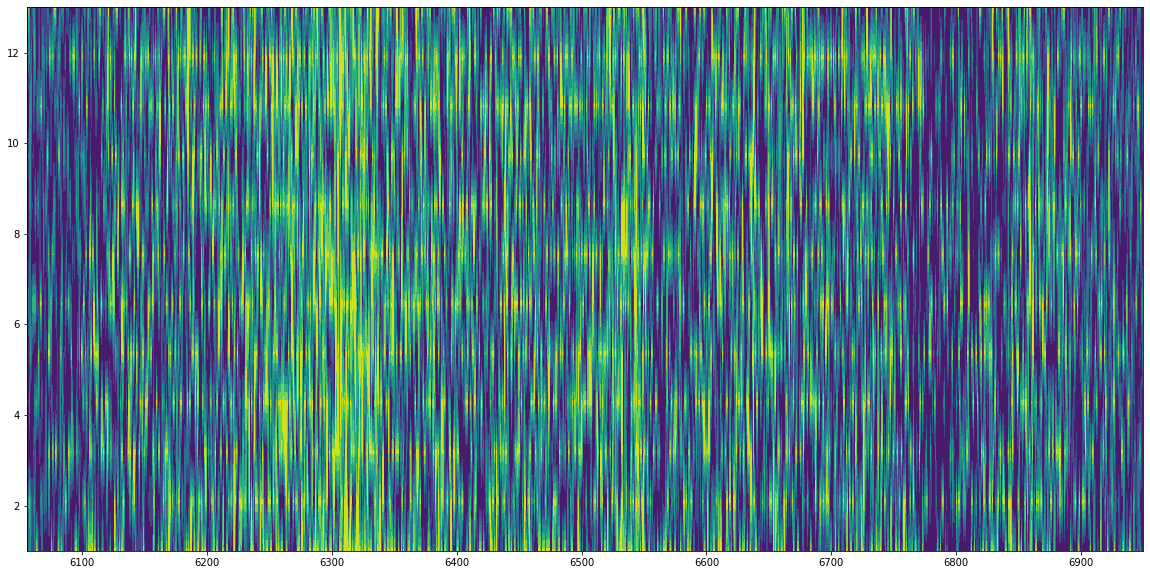

In [41]:
plt.figure(figsize=(20,10))
X,Y = np.meshgrid(dataframeR1['Wavelength'][startR1:endR1], np.linspace(1,13,12))
plt.contourf(X,Y,np.clip(allFluxesR, 0, 50))
#plt.savefig('specpolVI.pdf')

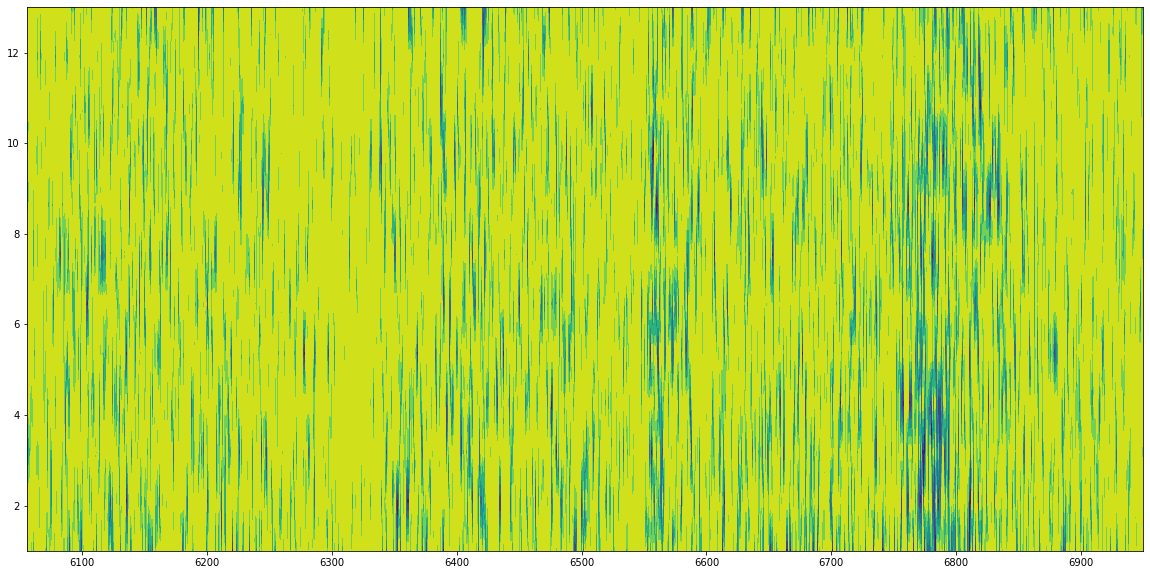

In [42]:
plt.figure(figsize=(20,10))
X,Y = np.meshgrid(dataframeR1['Wavelength'][startR1:endR1], np.linspace(1,13,12))
plt.contourf(X,Y,np.clip(allFluxesR, -50, 0))
#plt.savefig('specpolVI.pdf')

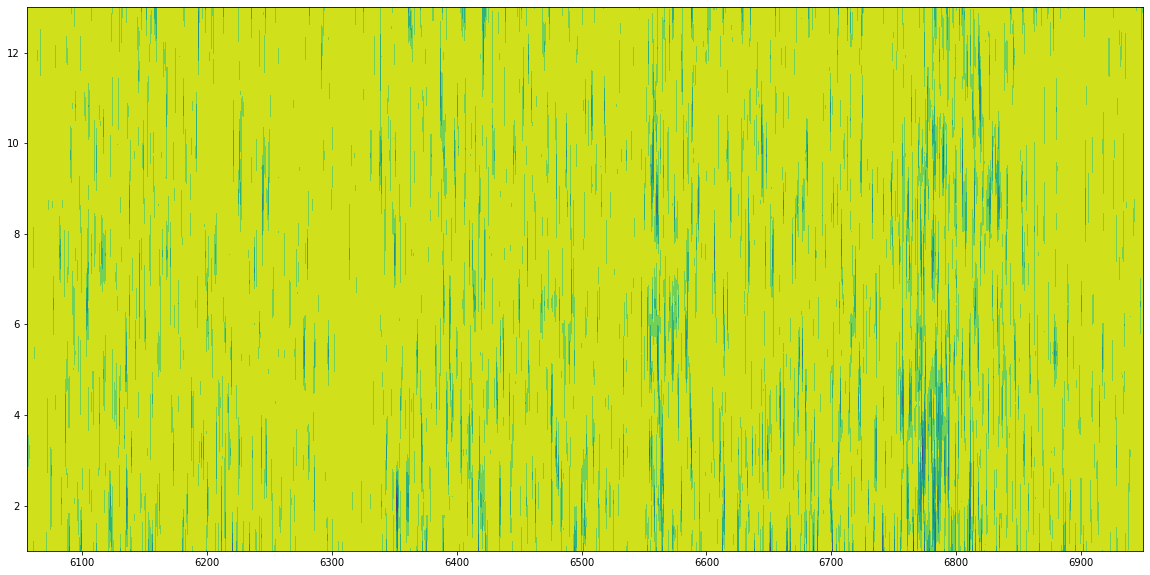

In [43]:
plt.figure(figsize=(20,10))
X,Y = np.meshgrid(dataframeR1['Wavelength'][startR1:endR1], np.linspace(1,13,12))
plt.contourf(X,Y,np.clip(allFluxesR, -100, 0))
#plt.savefig('specpolVI.pdf')

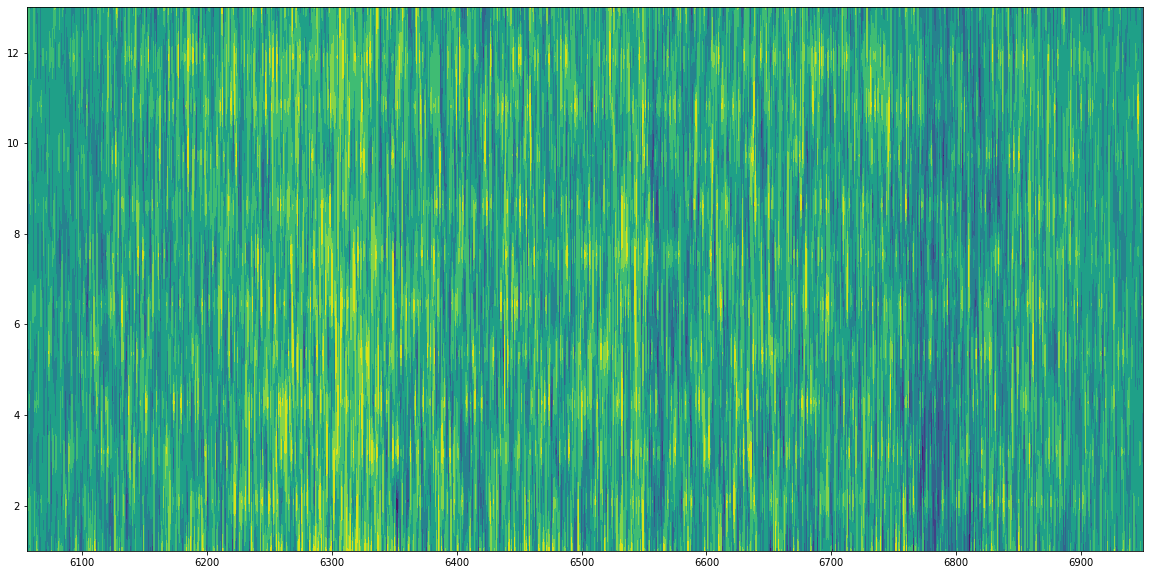

In [44]:
plt.figure(figsize=(20,10))
X,Y = np.meshgrid(dataframeR1['Wavelength'][startR1:endR1], np.linspace(1,13,12))
plt.contourf(X,Y,np.clip(allFluxesR, -100, 100))
#plt.savefig('specpolVI.pdf')